In [360]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 

# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# initial plotting and plot styling libraries (will be overriden)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image


# JUPYTER THEME OVERRIDES
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')
# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 8)
# recet to matplotlib standards
#jtplot.reset()


# MATPLOTLIB OVERRIDES
plt.rcParams['savefig.dpi'] = 120
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['text.usetex'] = False
#plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = b"\usepackage{subdepth}, \usepackage{type1cm}"

# Linear Regression Analysis

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Exploration

In [84]:
df = pd.read_csv('./data/USA_Housing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [85]:
# quick statistical info
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count        5000.00000           5000.00000                 5000.00000   
mean        68583.10898              5.97722                    6.98779   
std         10657.99121              0.99146                    1.00583   
min         17796.63119              2.64430                    3.23619   
25%         61480.56239              5.32228                    6.29925   
50%         68804.28640              5.97043                    7.00290   
75%         75783.33867              6.65081                    7.66587   
max        107701.74838              9.51909                   10.75959   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                    5000.00000       5000.00000    5000.00000  
mean                        3.98133      36163.51604 1232072.65414  
std                         1.23414       9925.65011  353117.62658  
min                         2.00000        172.61069   15938.65792  
25%                         3.14000      29403.92870  997577.13505  
50%                         4.05000      36199.40669 1232669.37797  
75%                         4.49000      42861.29077 1471210.20421  
max                         6.50000      69621.71338 2469065.59417

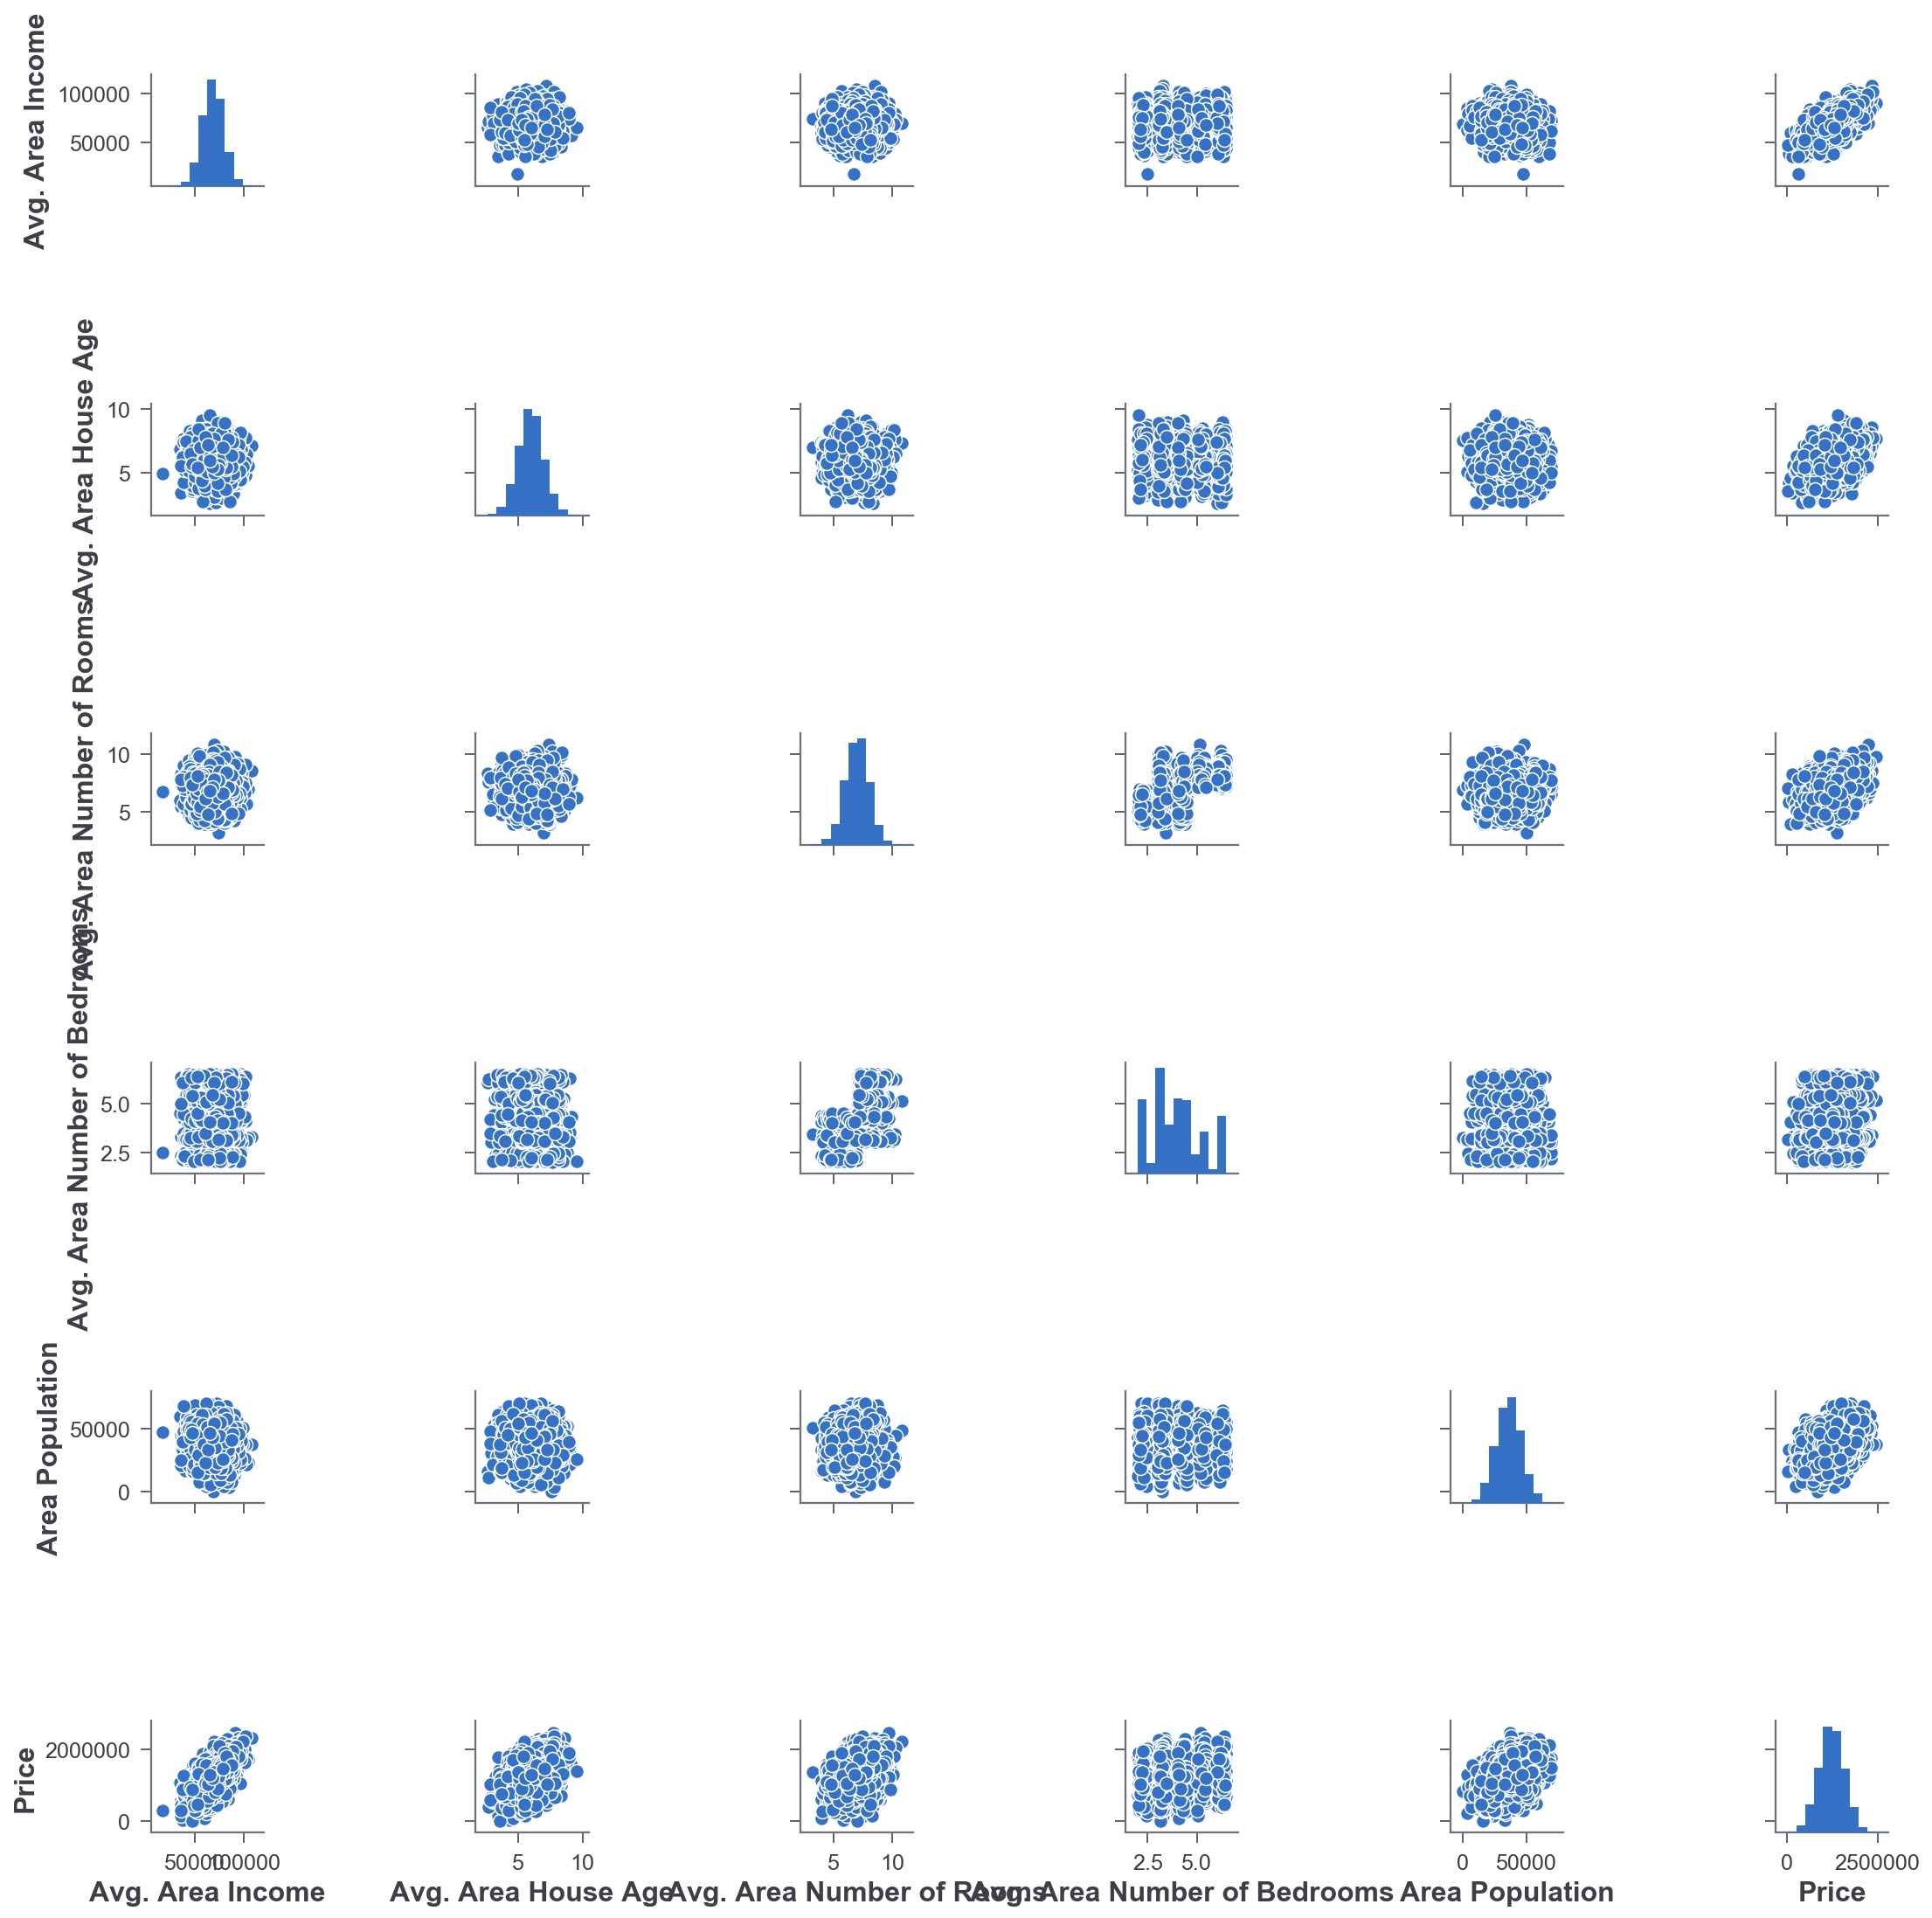

In [86]:
sns.pairplot(df)

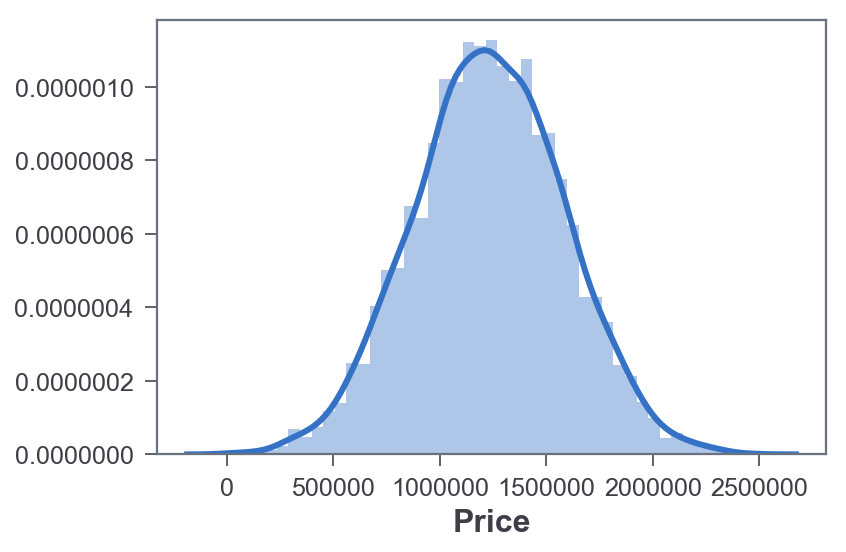

In [21]:
sns.distplot(df['Price'])

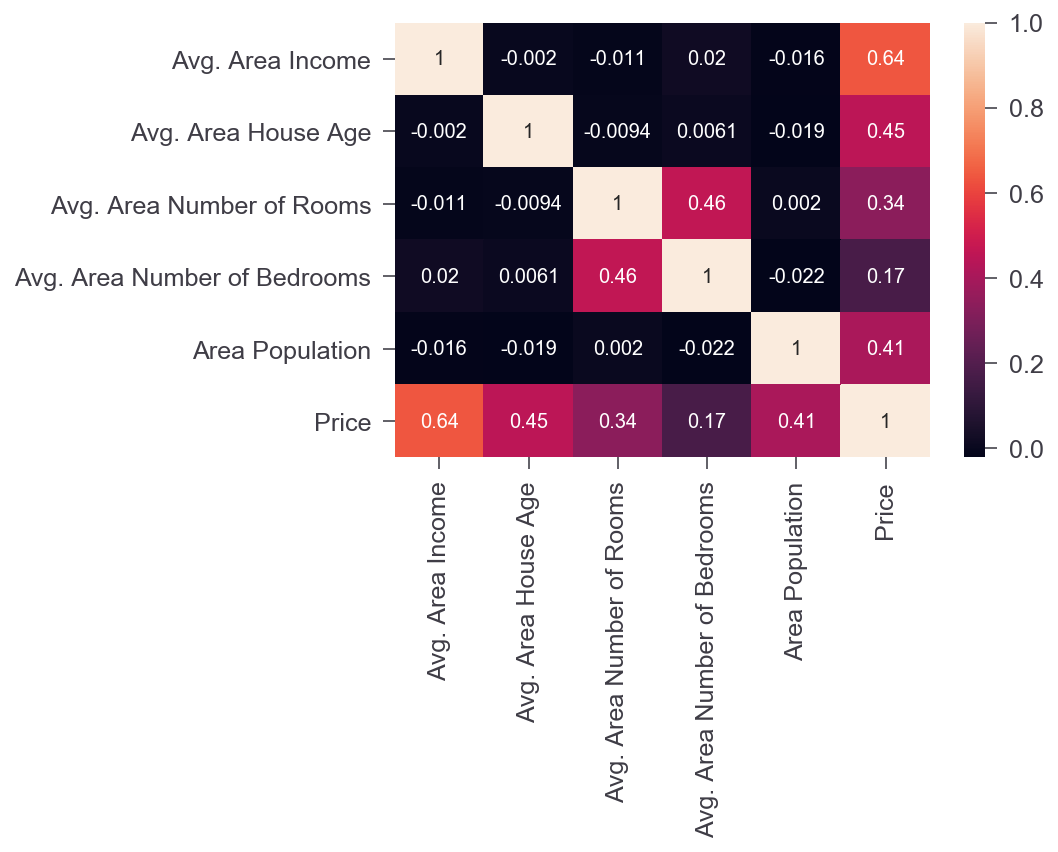

In [23]:
sns.heatmap(df.corr(), annot=True)

## Training

In [24]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [27]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [28]:
y = df['Price']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
lm.coef_

array([    21.52828, 164883.28203, 122368.67803,   2233.80186,
           15.15042])

In [40]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])

Coefficients
Avg. Area Income                  21.52828
Avg. Area House Age           164883.28203
Avg. Area Number of Rooms     122368.67803
Avg. Area Number of Bedrooms    2233.80186
Area Population                   15.15042

## Predictions

In [41]:
y_pred = lm.predict(X_test)

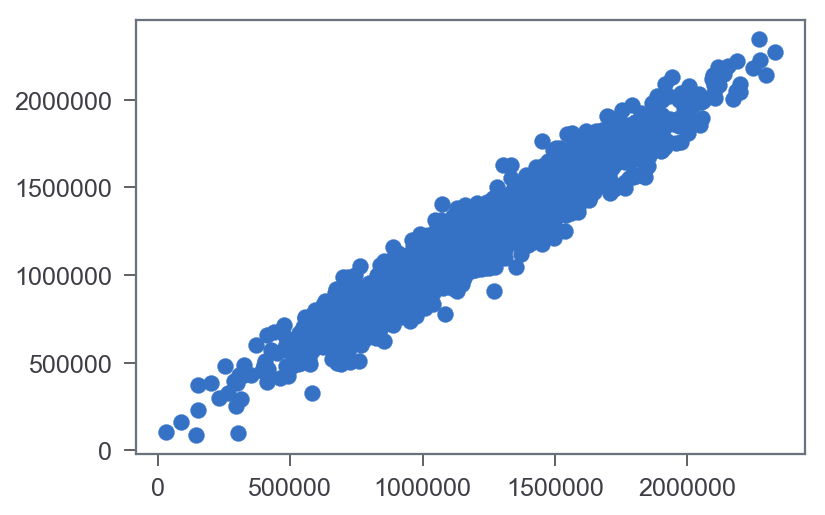

In [42]:
plt.scatter(y_test, y_pred)

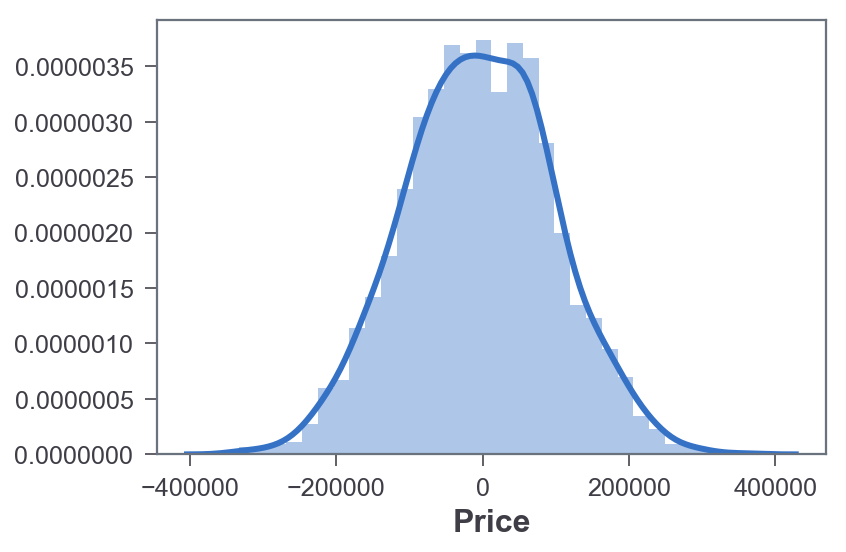

In [43]:
sns.distplot(y_test - y_pred)

In [44]:
from sklearn import metrics

In [45]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test, y_pred)

82288.22251914957

In [46]:
# Mean Squared Error
metrics.mean_squared_error(y_test, y_pred)

10460958907.209507

In [49]:
# Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

102278.82922291156

## Use Case

In [56]:
customers = pd.read_csv('./data/Ecommerce Customers')

In [57]:
customers

Email  \
0        mstephenson@fernandez.com   
1                hduke@hotmail.com   
2                 pallen@yahoo.com   
3          riverarebecca@gmail.com   
4    mstephens@davidson-herman.com   
5           alvareznancy@lucas.biz   
6            katherine20@yahoo.com   
7               awatkins@yahoo.com   
..                             ...   
492     davidsonkathleen@gmail.com   
493            nathan84@lowery.net   
494          kellydeborah@chan.biz   
495   lewisjessica@craig-evans.com   
496            katrina56@gmail.com   
497             dale88@hotmail.com   
498            cwilson@hotmail.com   
499      hannahwilson@davidson.com   

                                               Address            Avatar  \
0         835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1       4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2    24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3     1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   
5    645 Martha Park Apt. 611\nJeffreychester, MN 6...       FloralWhite   
6    68388 Reyes Lights Suite 692\nJosephbury, WV 9...     DarkSlateBlue   
7                Unit 6538 Box 8980\nDPO AP 09026-4941              Aqua   
..                                                 ...               ...   
492   70128 Zimmerman Overpass\nRobertsshire, VA 59860          DarkBlue   
493  01242 Stephanie Ways Suite 003\nChurchville, M...    MediumSeaGreen   
494    354 Sanchez Wall Suite 884\nJuliabury, VI 39735     DarkTurquoise   
495  4483 Jones Motorway Suite 872\nLake Jamiefurt,...               Tan   
496  172 Owen Divide Suite 497\nWest Richard, CA 19320     PaleVioletRed   
497  0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...          Cornsilk   
498  680 Jennifer Lodge Apt. 808\nBrendachester, TX...              Teal   
499  49791 Rachel Heights Apt. 898\nEast Drewboroug...       DarkMagenta   

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0               34.49727     12.65565         39.57767               4.08262   
1               31.92627     11.10946         37.26896               2.66403   
2               33.00091     11.33028         37.11060               4.10454   
3               34.30556     13.71751         36.72128               3.12018   
4               33.33067     12.79519         37.53665               4.44631   
5               33.87104     12.02693         34.47688               5.49351   
6               32.02160     11.36635         36.68378               4.68502   
7               32.73914     12.35196         37.37336               4.43427   
..                   ...          ...              ...                   ...   
492             33.68094     11.20157         37.83545               2.20881   
493             32.06091     12.62543         35.53914               5.41236   
494             33.43110     13.35063         37.96597               2.76885   
495             33.23766     13.56616         36.41798               3.74657   
496             34.70253     11.69574         37.19027               3.57653   
497             32.64678     11.49941         38.33258               4.95826   
498             33.32250     12.39142         36.84009               2.33648   
499             33.71598     12.41881         35.77102               2.73516   

     Yearly Amount Spent  
0              587.95105  
1              392.20493  
2              487.54750  
3              581.85234  
4              599.40609  
5              637.10245  
6              521.57217  
7              549.90415  
..                   ...  
492            403.81952  
493            627.60332  
494            510.66179  
495            573.84744  
496            529.04900  
497            551.62015  
498            456.46951  
499            497.77864  

[500 rows x 8 columns]

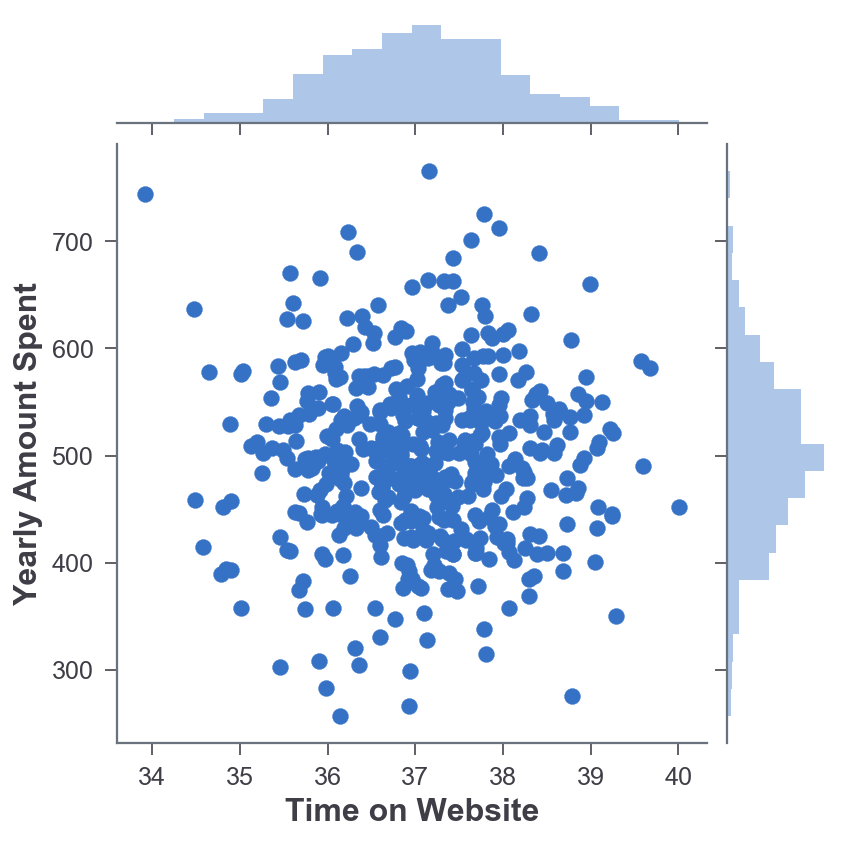

In [58]:
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent')

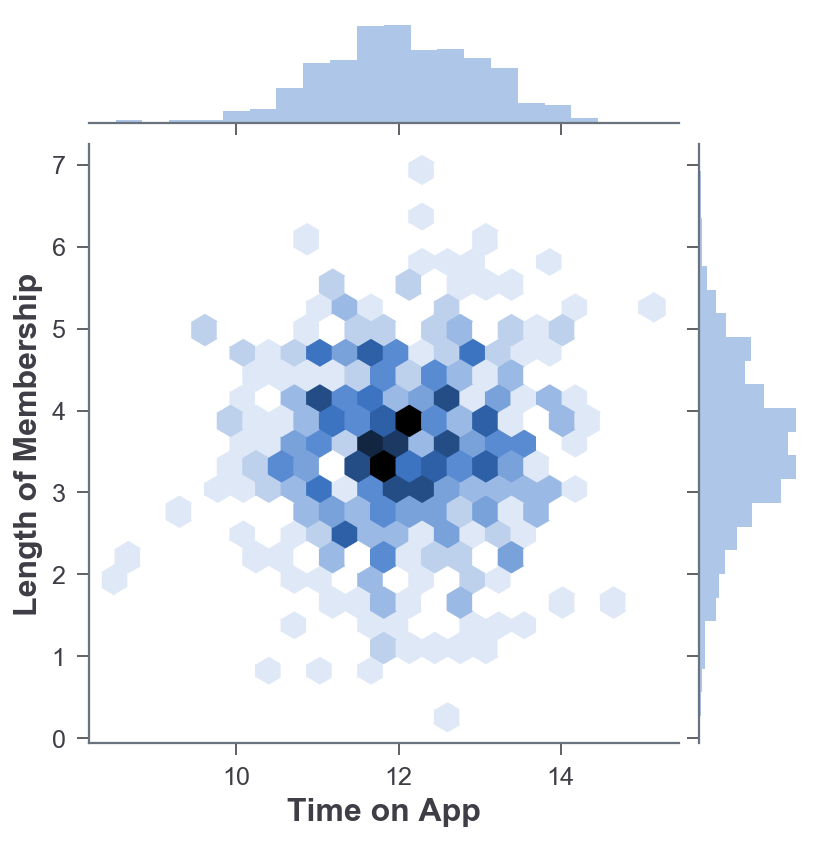

In [59]:
sns.jointplot(data=customers, x='Time on App', y='Length of Membership', kind='hex')

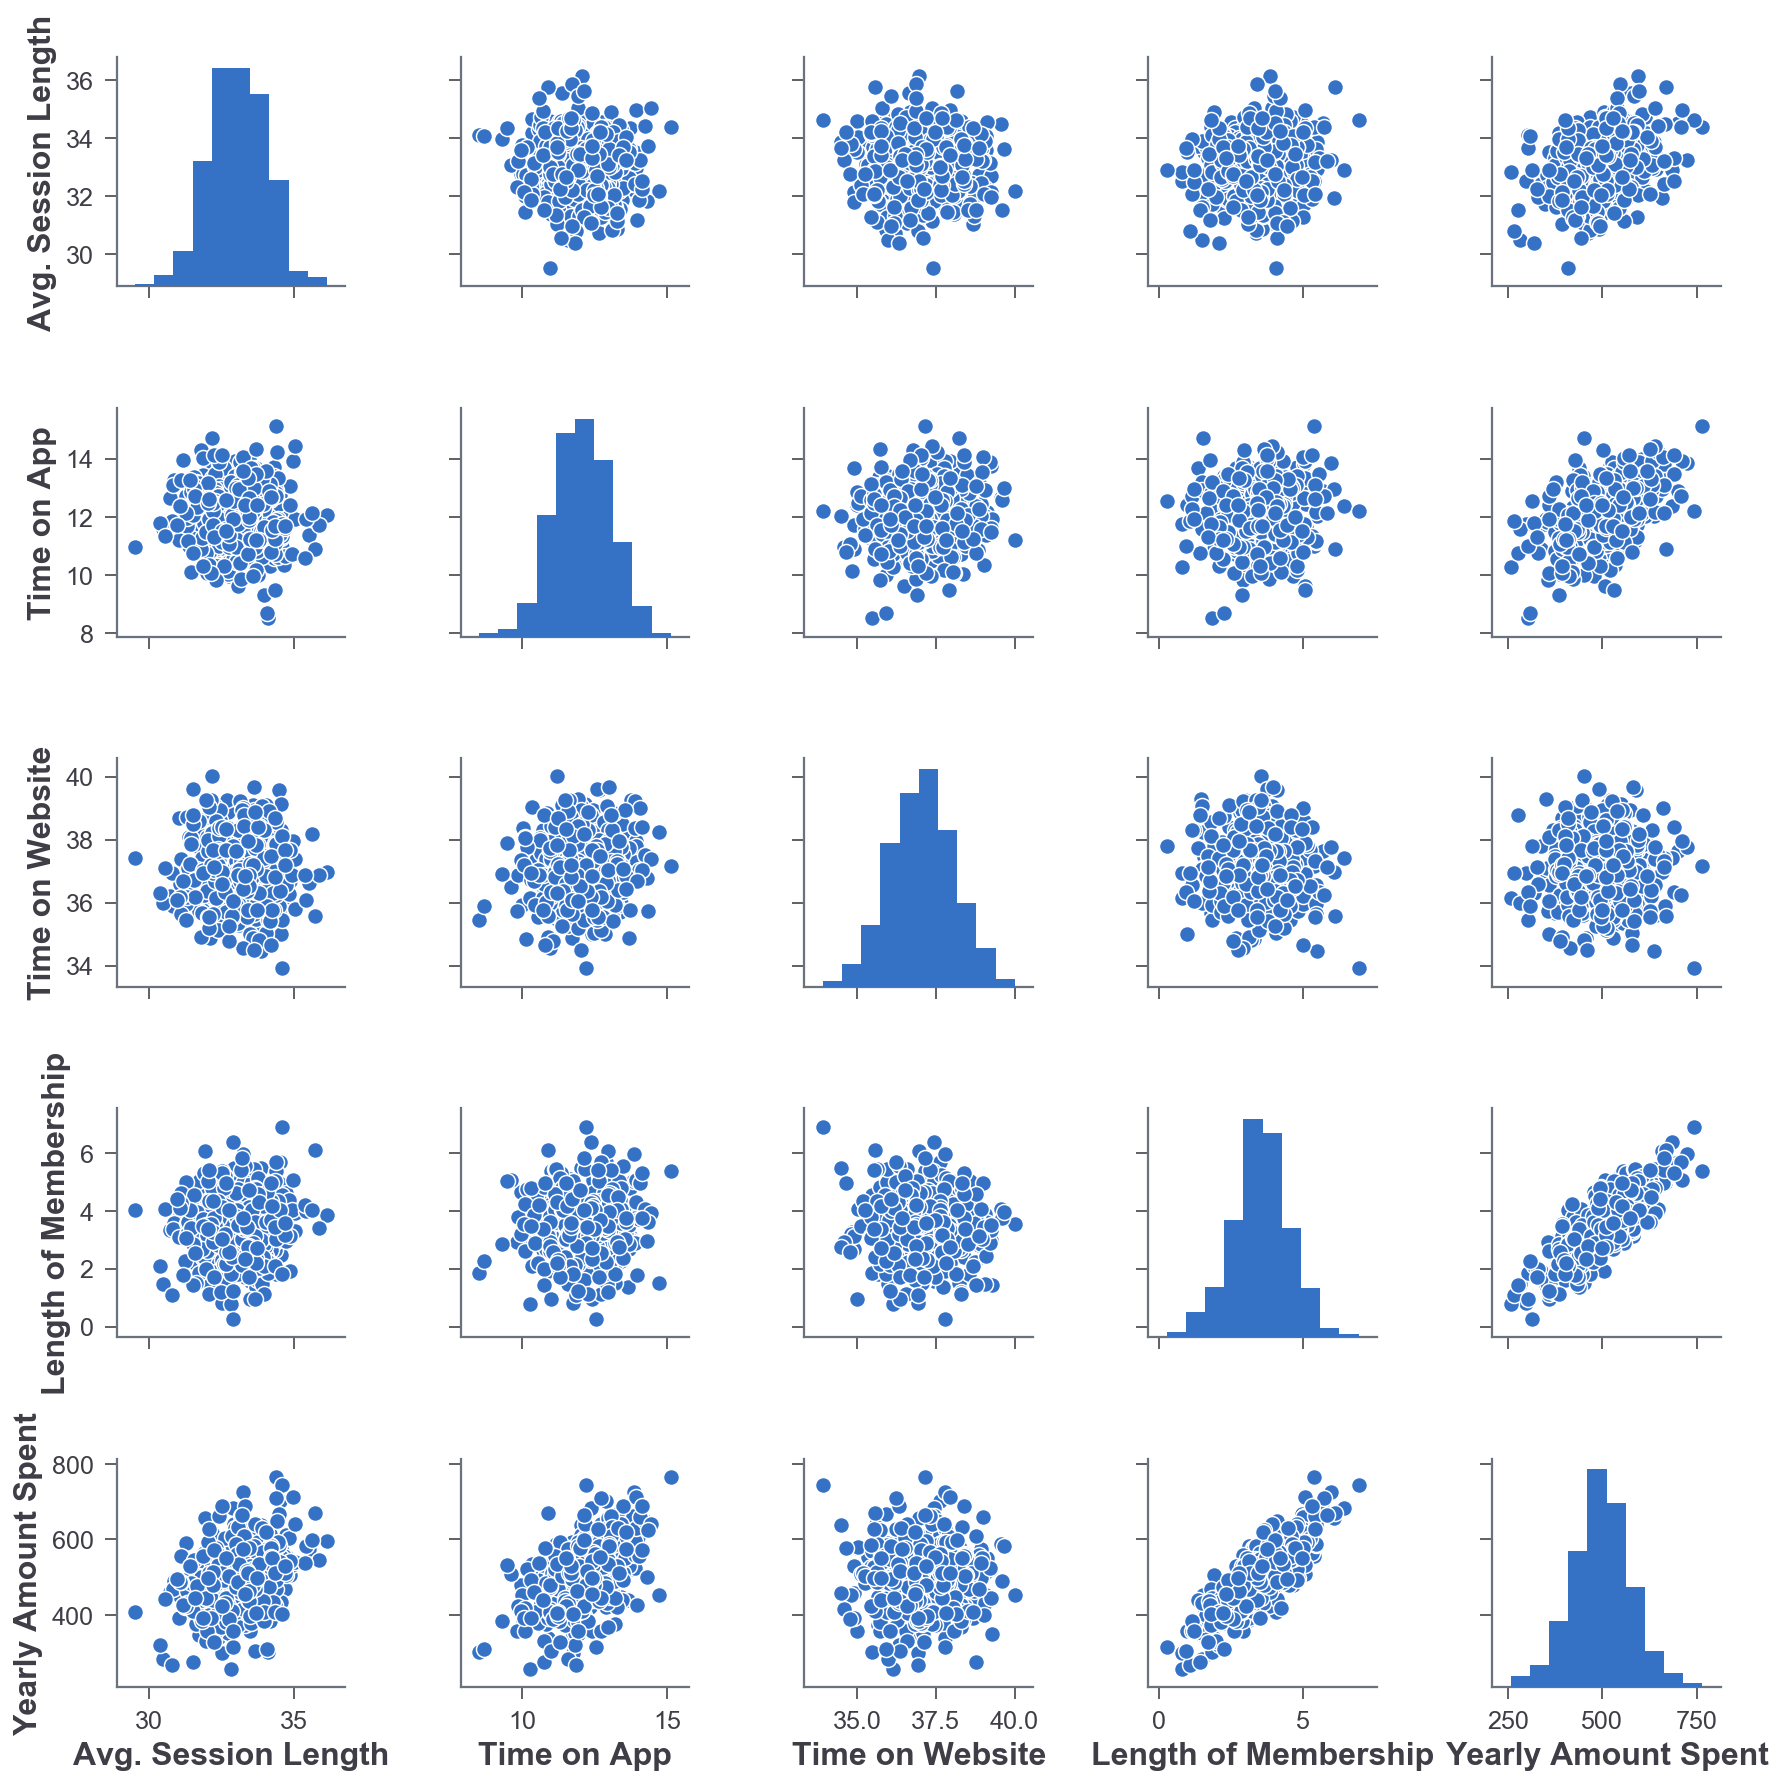

In [60]:
sns.pairplot(customers)

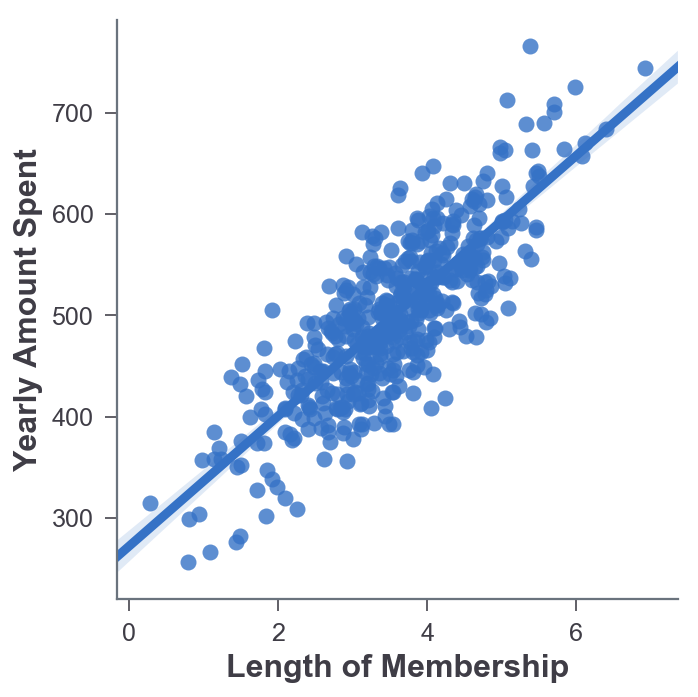

In [61]:
sns.lmplot(data=customers, x='Length of Membership', y='Yearly Amount Spent')

In [63]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [66]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [69]:
lm = LinearRegression()

In [70]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lm.coef_

array([25.98155, 38.59016,  0.19041, 61.2791 ])

In [72]:
y_pred = lm.predict(X_test)

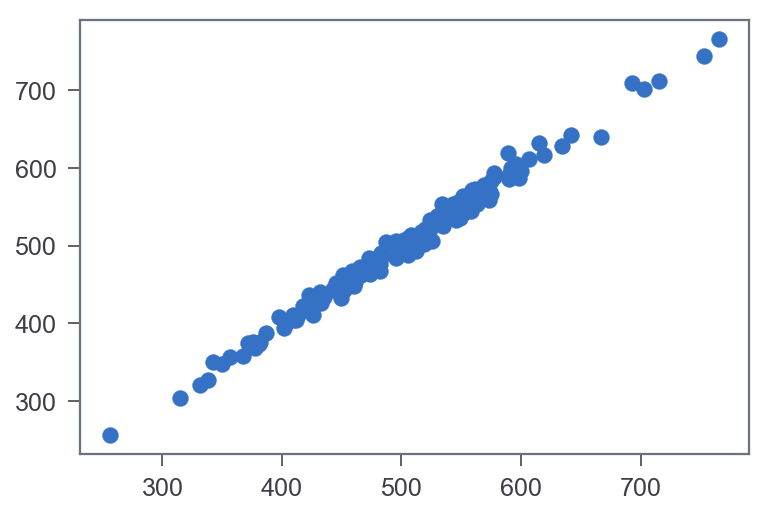

In [74]:
plt.scatter(y_pred, y_test)

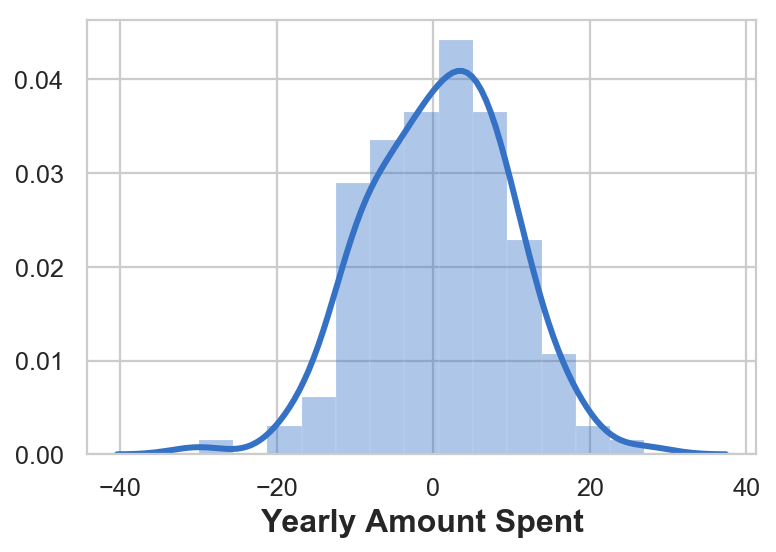

In [97]:
sns.distplot(y_pred-y_test)

In [87]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R^2: ', metrics.explained_variance_score(y_test, y_pred))

MAE:  7.228148653430838
MSE:  79.81305165097461
RMSE:  2.6885216483098735
R^2:  0.9890771231889606


In [82]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])

Coefficients
Avg. Session Length       25.98155
Time on App               38.59016
Time on Website            0.19041
Length of Membership      61.27910

# Logist Regression Analysis

Use for binary classification problems.

$ 
\phi(z)= \frac{1}{1+e^{-z}}
$

## Bias Variance Trade-off

The bias-variance trade-off is the point where we are adding noise by adding model complexity (flexibility).

The training error is going down, while the test error is going up.

The model after the bias-variance trade-off point begins to overfit.

In [134]:
train = pd.read_csv('./data/titanic_train.csv')

In [135]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

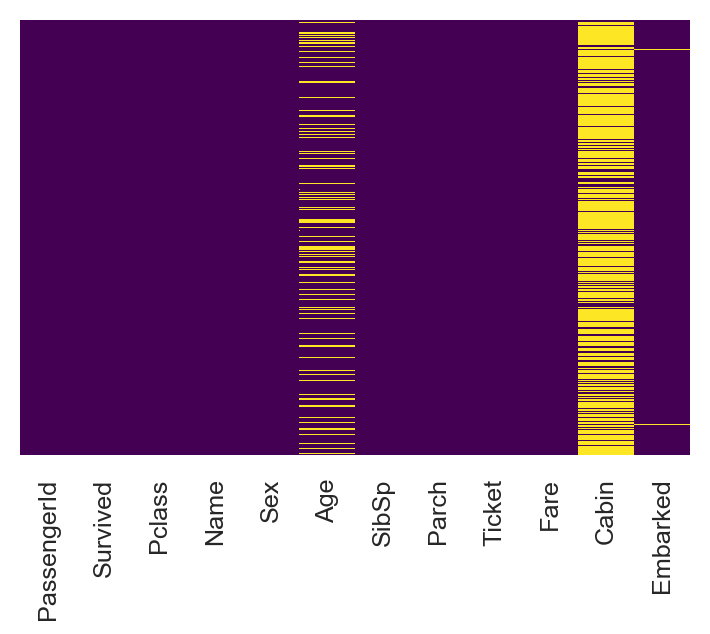

In [136]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [137]:
sns.set_style('whitegrid')

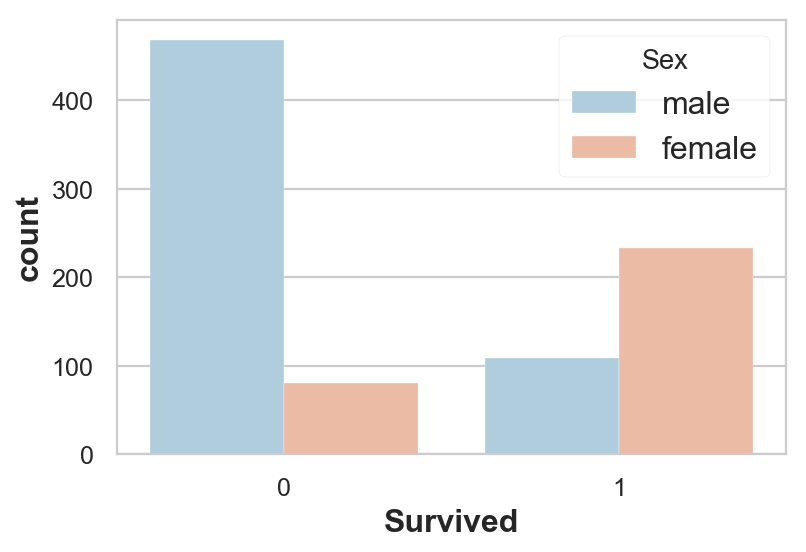

In [138]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

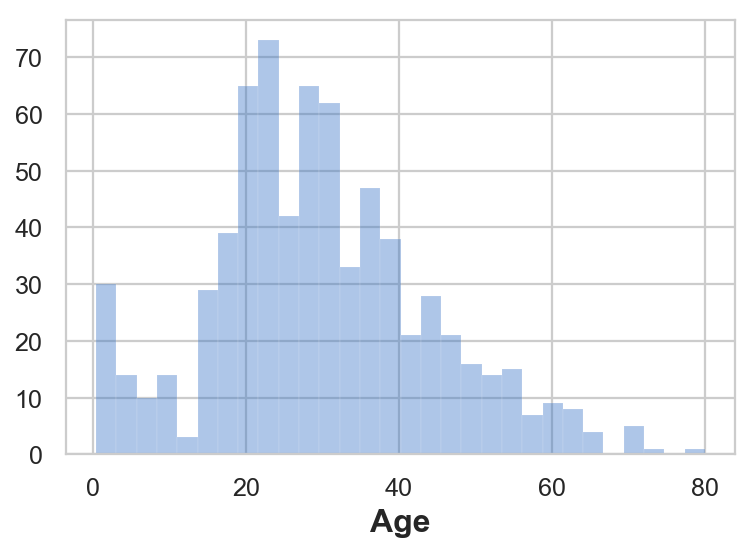

In [139]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)
#train['Age'].plot.hist(bins=30)

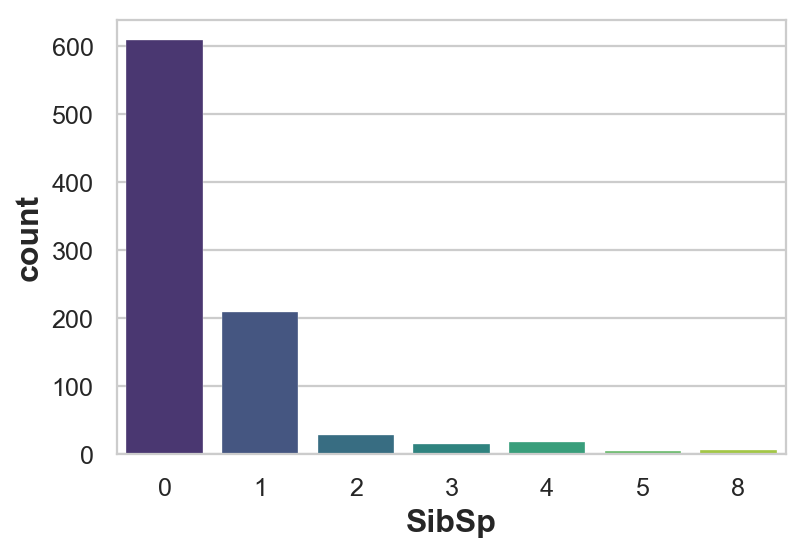

In [140]:
sns.countplot(x='SibSp', data=train, palette='viridis')

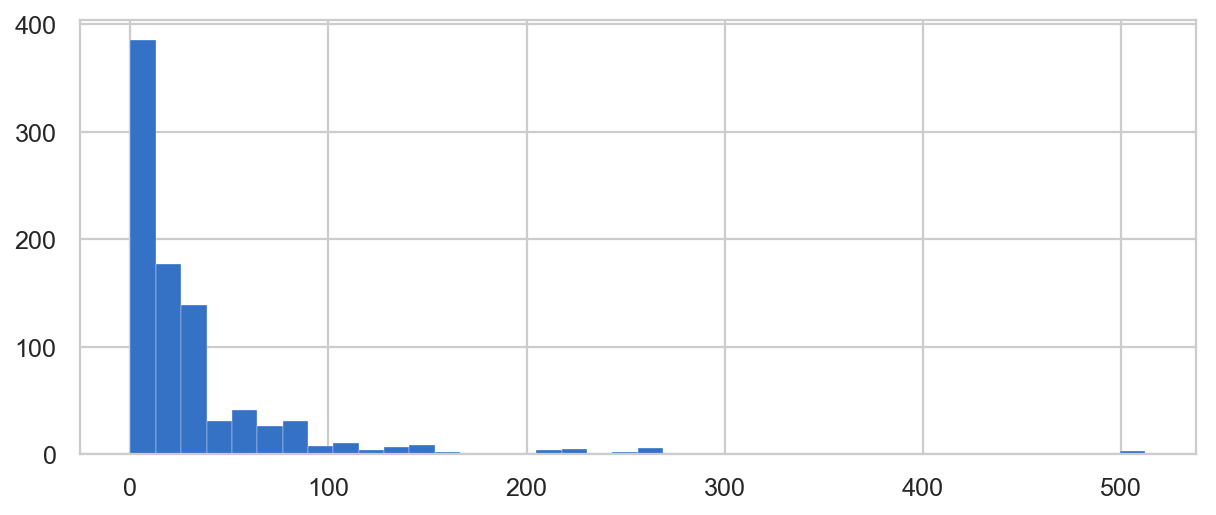

In [141]:
train['Fare'].hist(bins=40, figsize=(10,4))

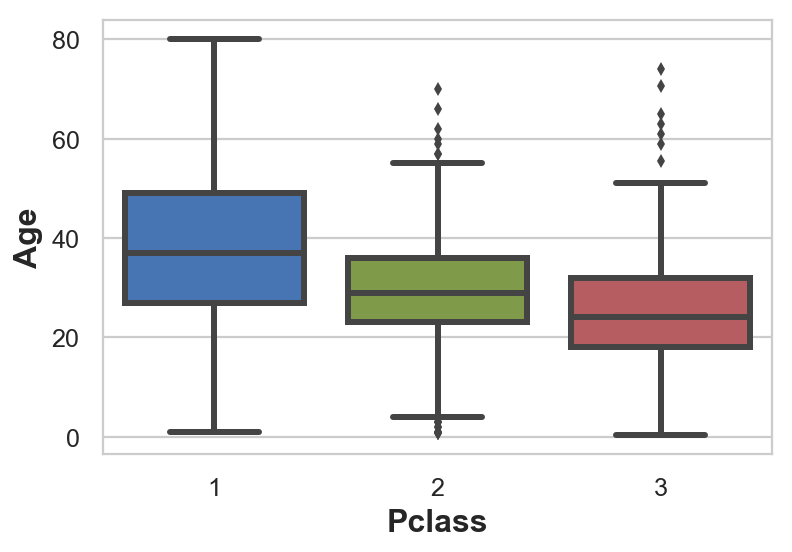

In [142]:
sns.boxplot(x='Pclass', y='Age', data=train)

## Imputation

In [143]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return age

In [144]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

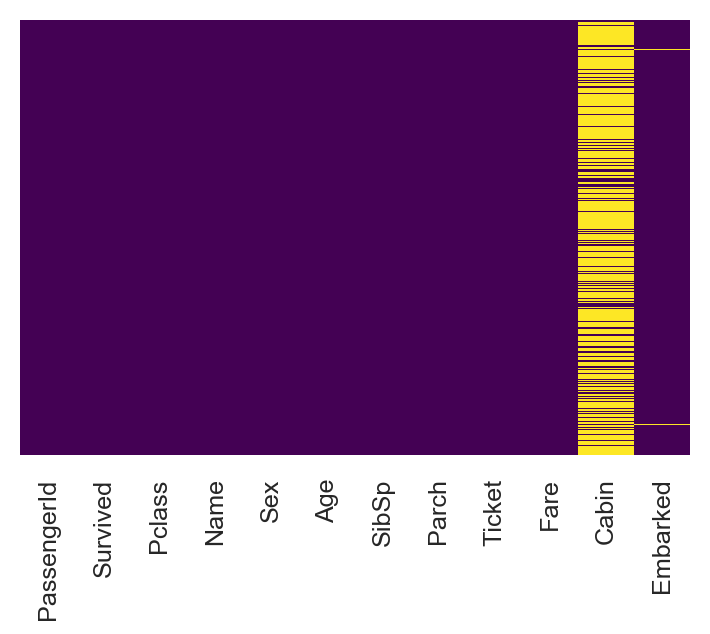

In [145]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Drop missing values

In [146]:
train.dropna(inplace=True)

In [147]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [148]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [149]:
train = pd.concat([train, sex, embark], axis=1)

In [151]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [152]:
train.tail()

Survived  Pclass      Age  SibSp  Parch     Fare        Cabin  male  Q  S
871         1       1 47.00000      1      1 52.55420          D35     0  0  1
872         0       1 33.00000      0      0  5.00000  B51 B53 B55     1  0  1
879         1       1 56.00000      0      1 83.15830          C50     0  0  0
887         1       1 19.00000      0      0 30.00000          B42     0  0  1
889         1       1 26.00000      0      0 30.00000         C148     1  0  0

## Training

In [156]:
from sklearn.linear_model import LogisticRegression

In [161]:
y_train

177    0
245    0
412    1
806    0
887    1
269    1
872    0
669    1
      ..
618    1
336    0
390    1
305    1
325    1
351    0
55     1
438    0
Name: Survived, Length: 141, dtype: int64

In [163]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logm = LogisticRegression()
logm.fit(X_train, y_train)
y_pred = logm.predict(X_test)

ValueError: could not convert string to float: 'C23 C25 C27'

## Use Case

In [219]:
ad_data = pd.read_csv('./data/advertising.csv')

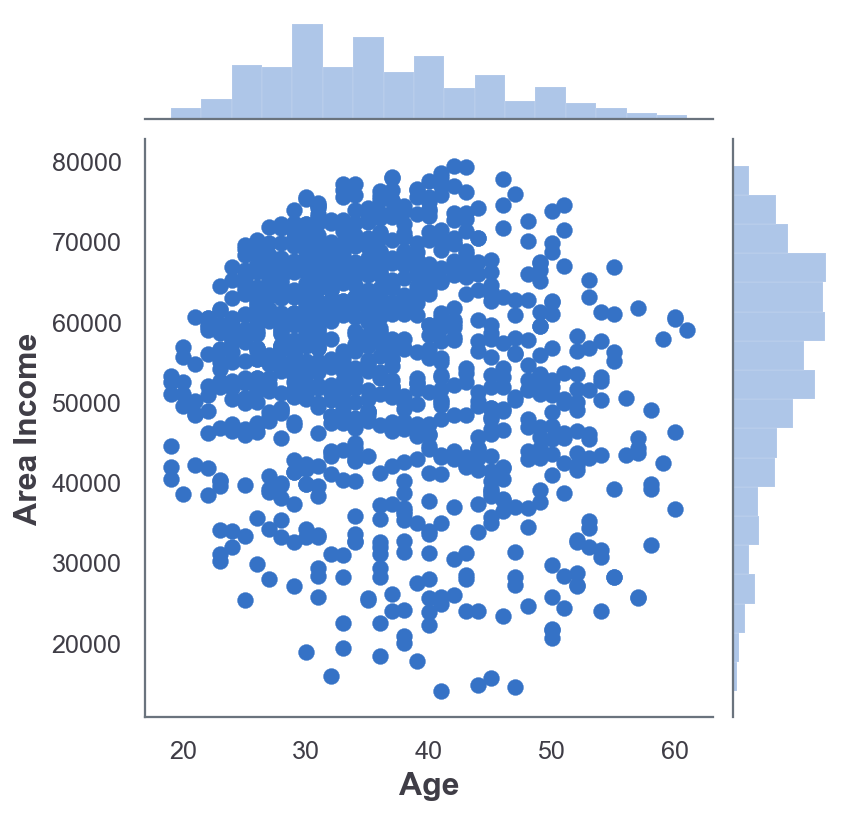

In [220]:
sns.jointplot(data=ad_data, x='Age', y='Area Income')

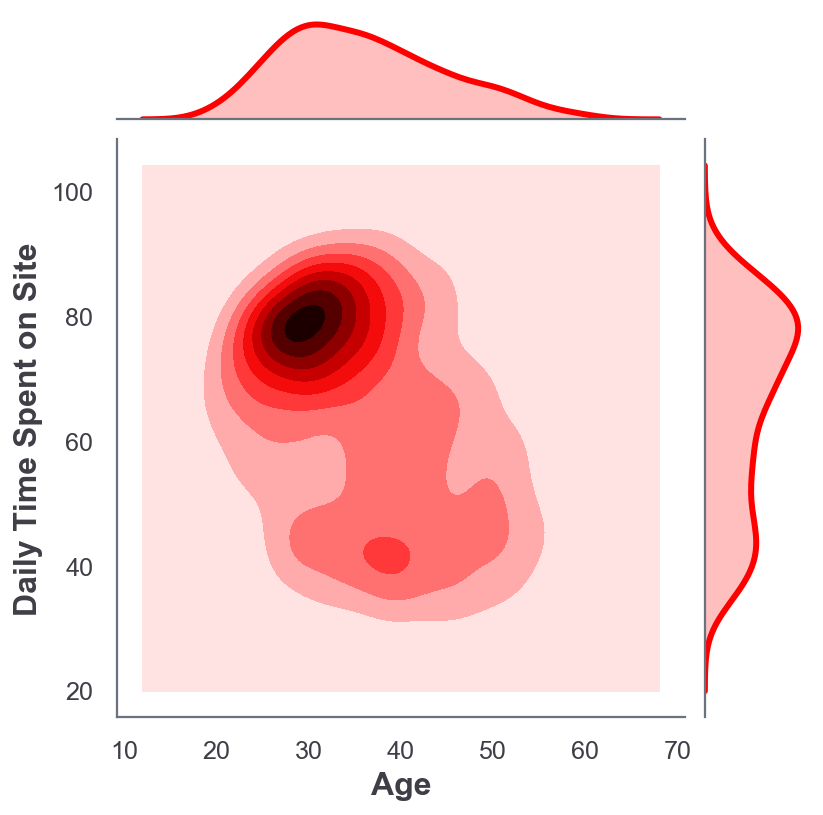

In [221]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red')

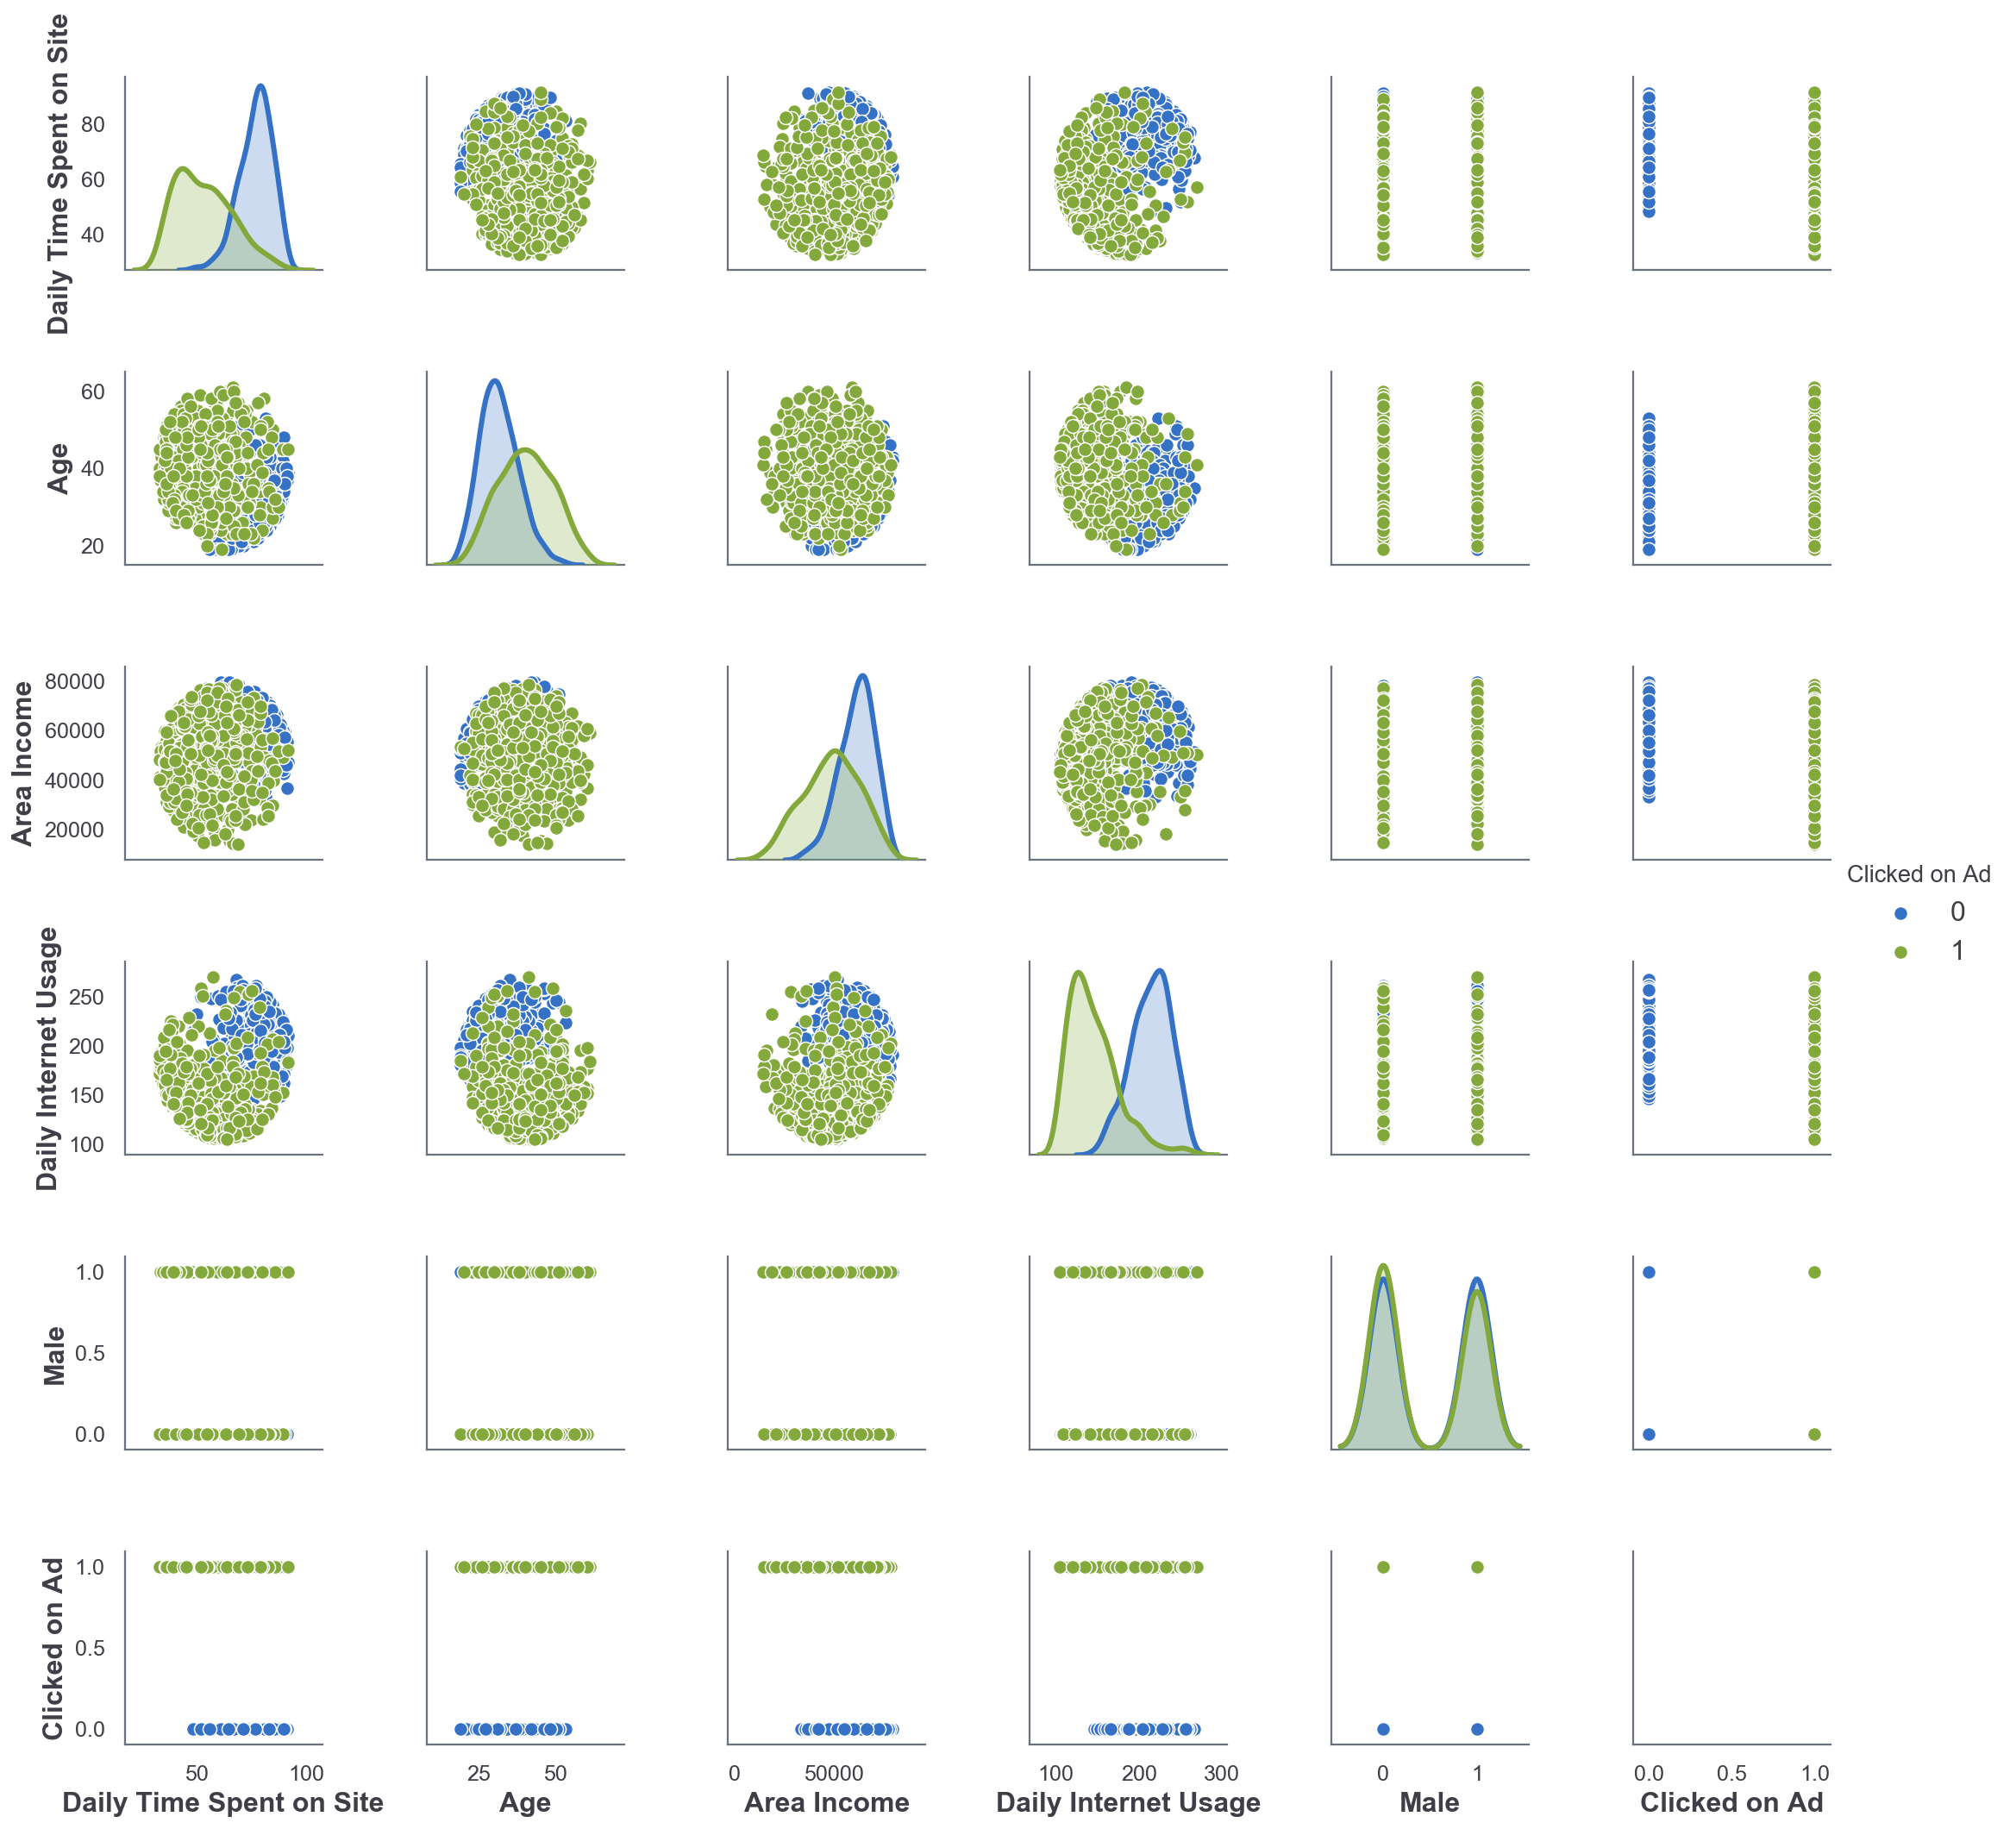

In [222]:
sns.pairplot(ad_data, hue='Clicked on Ad')

In [179]:
from sklearn.metrics import classification_report, confusion_matrix

In [182]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logm = LogisticRegression()
logm.fit(X_train, y_train)
y_pred = logm.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[149   8]
 [ 15 128]]


# K Nearest Neighbors

In [201]:
df = pd.read_csv('./data/Classified Data', index_col=0)

In [206]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [207]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [208]:
df_feat.head()

WTT      PTI      EQW      SBI      LQE      QWG      FDJ      PJF  \
0 -0.12354  0.18591 -0.91343  0.31963 -1.03364 -2.30837 -0.79895 -1.48237   
1 -1.08484 -0.43035 -1.02531  0.62539 -0.44485 -1.15271 -1.12980 -0.20224   
2 -0.78870  0.33932  0.30151  0.75587  2.03169 -0.87016  2.59982  0.28571   
3  0.98284  1.06019 -0.62140  0.62530  0.45282 -0.26722  1.75021  1.06649   
4  1.13928 -0.64039 -0.70982 -0.05717  0.82289 -0.93677  0.59678 -1.47235   

       HQE      NXJ  
0 -0.94972 -0.64331  
1 -1.82805  0.63676  
2 -0.68249 -0.37785  
3  1.24132 -1.02699  
4  1.04077  0.27651

In [224]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[153   6]
 [  7 134]]


In [213]:
# find best number 
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Error Rate')

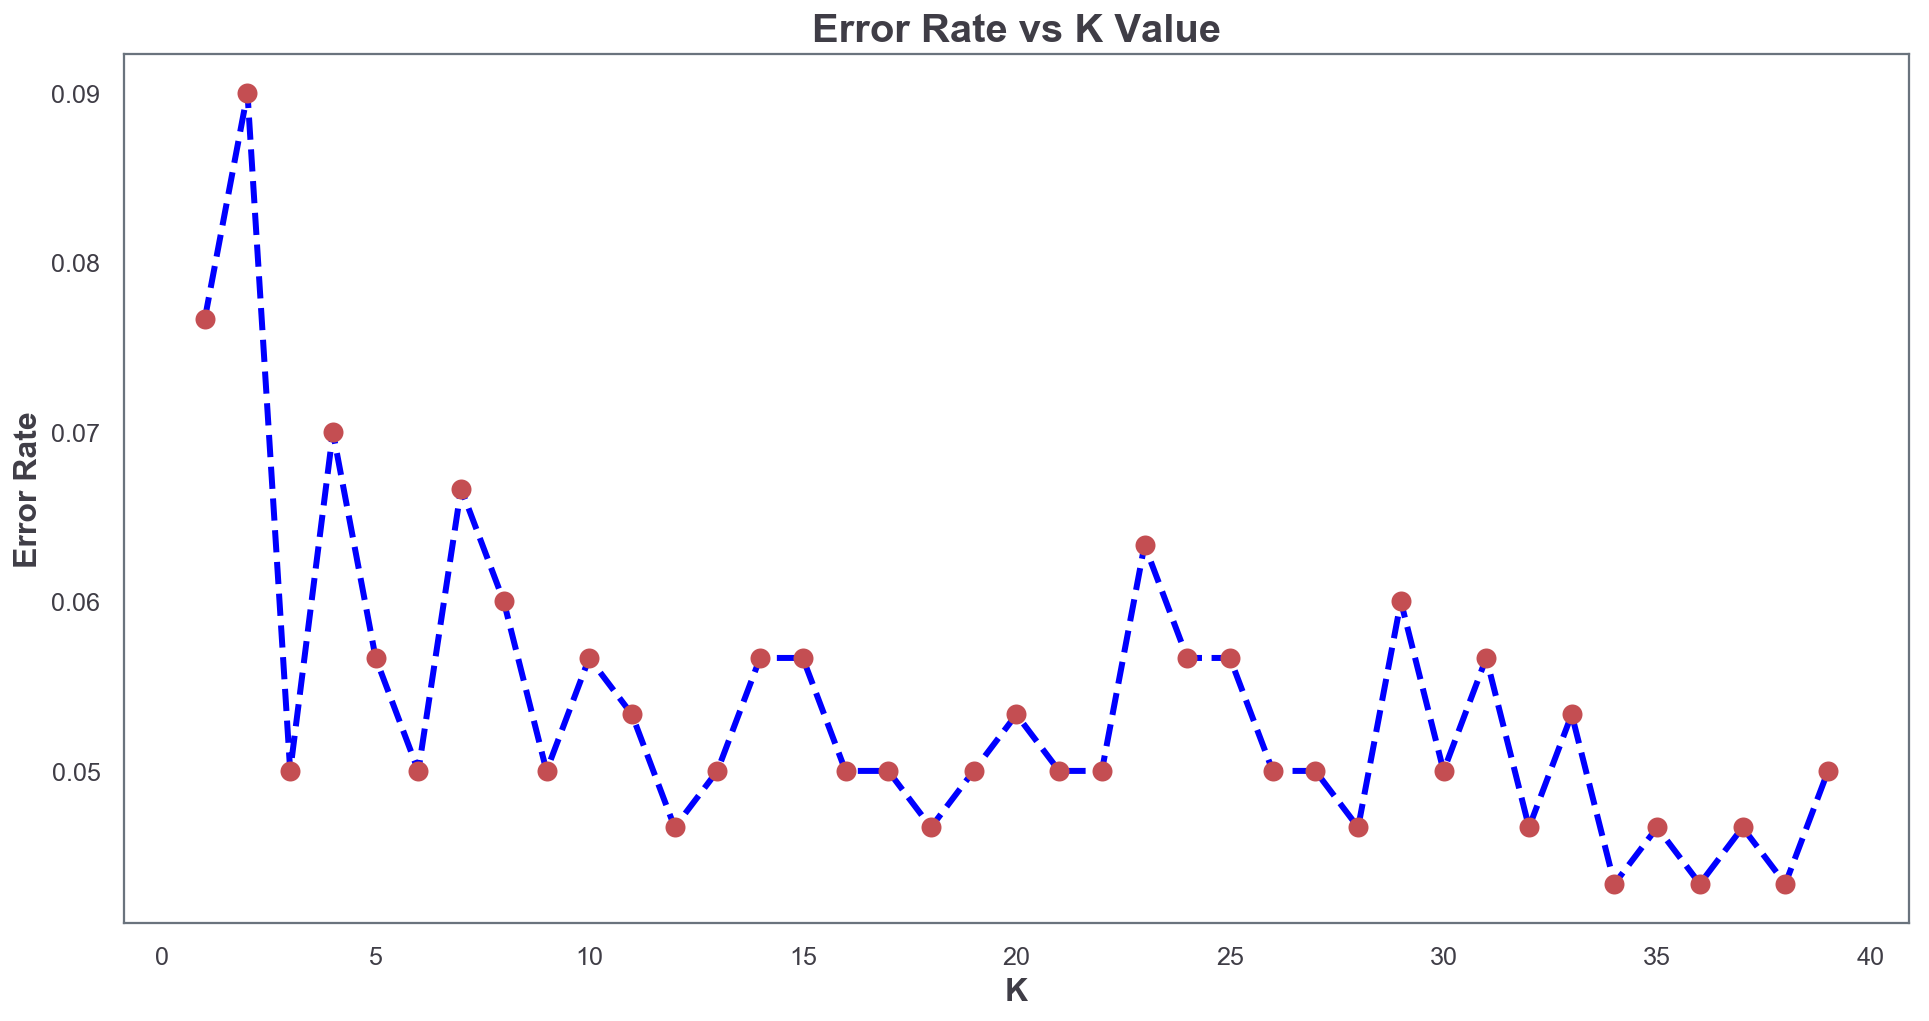

In [218]:
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='r', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Use Case

In [225]:
df = pd.read_csv('./data/KNN_Project_Data')

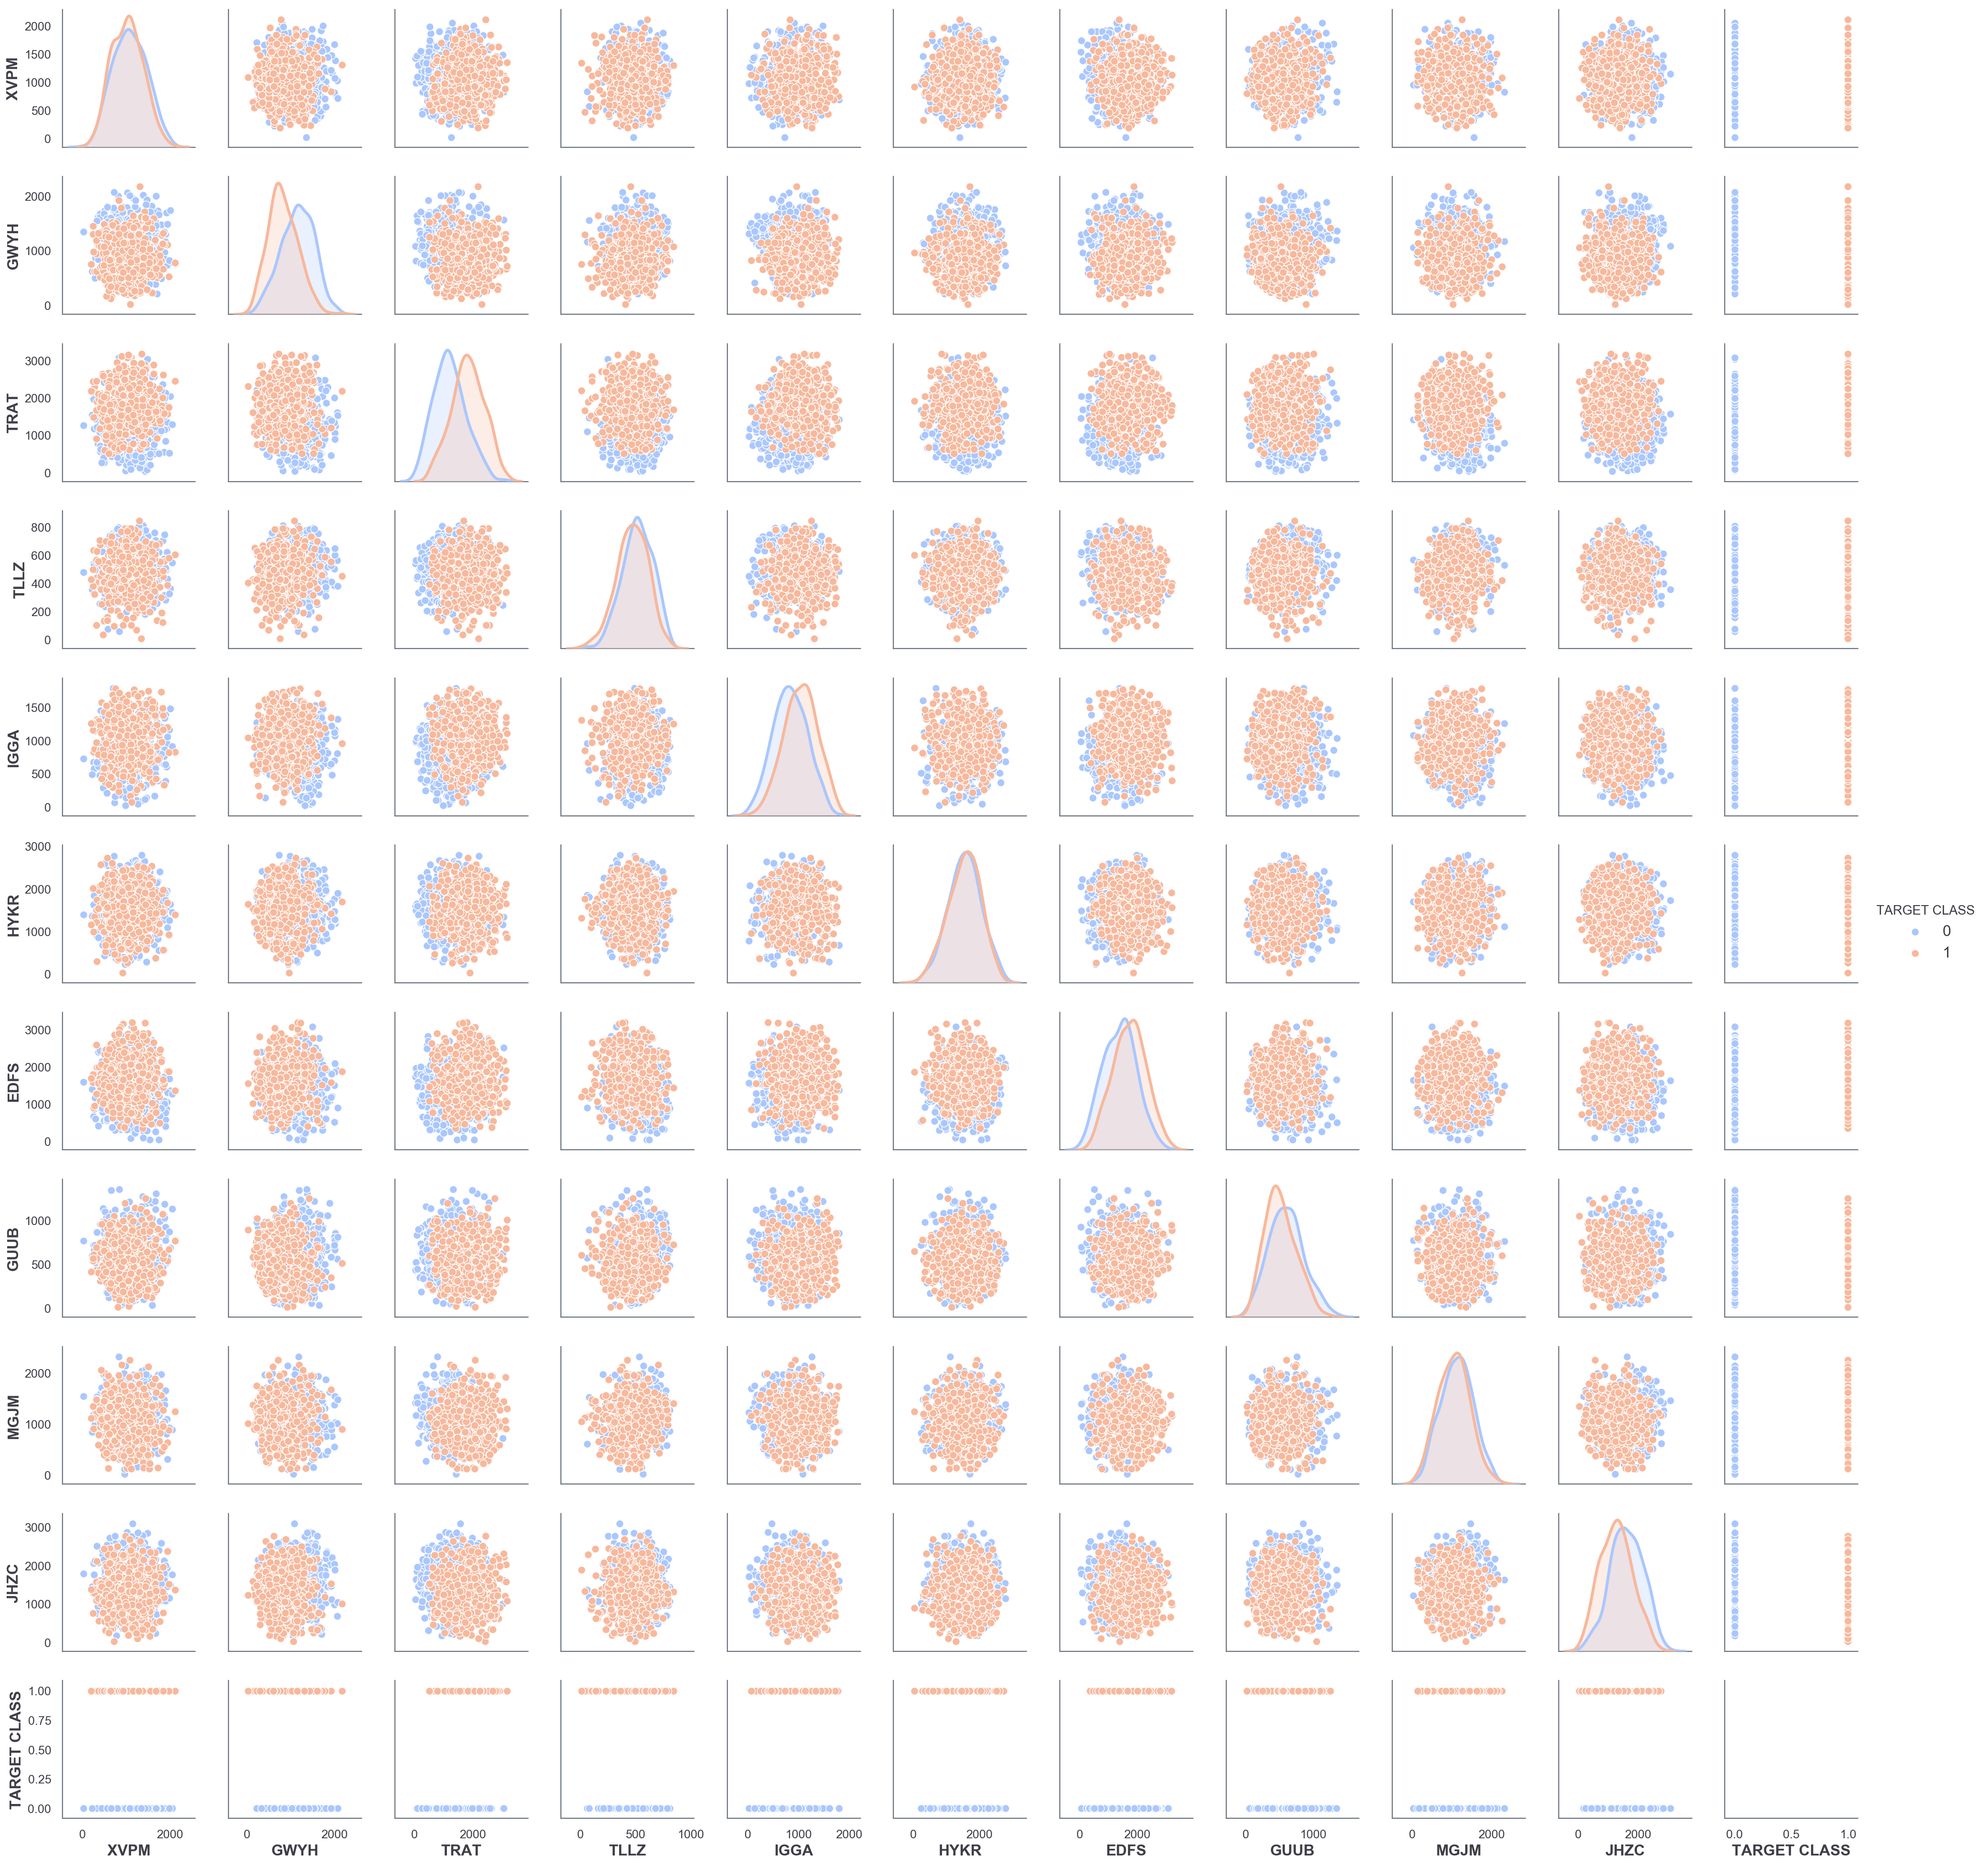

In [226]:
sns.pairplot(df, hue='TARGET CLASS', palette='coolwarm')

In [228]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))

scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       152
           1       0.81      0.84      0.83       148

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[123  29]
 [ 23 125]]


# Decision Trees

In [245]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [237]:
df = pd.read_csv('./data/kyphosis.csv')

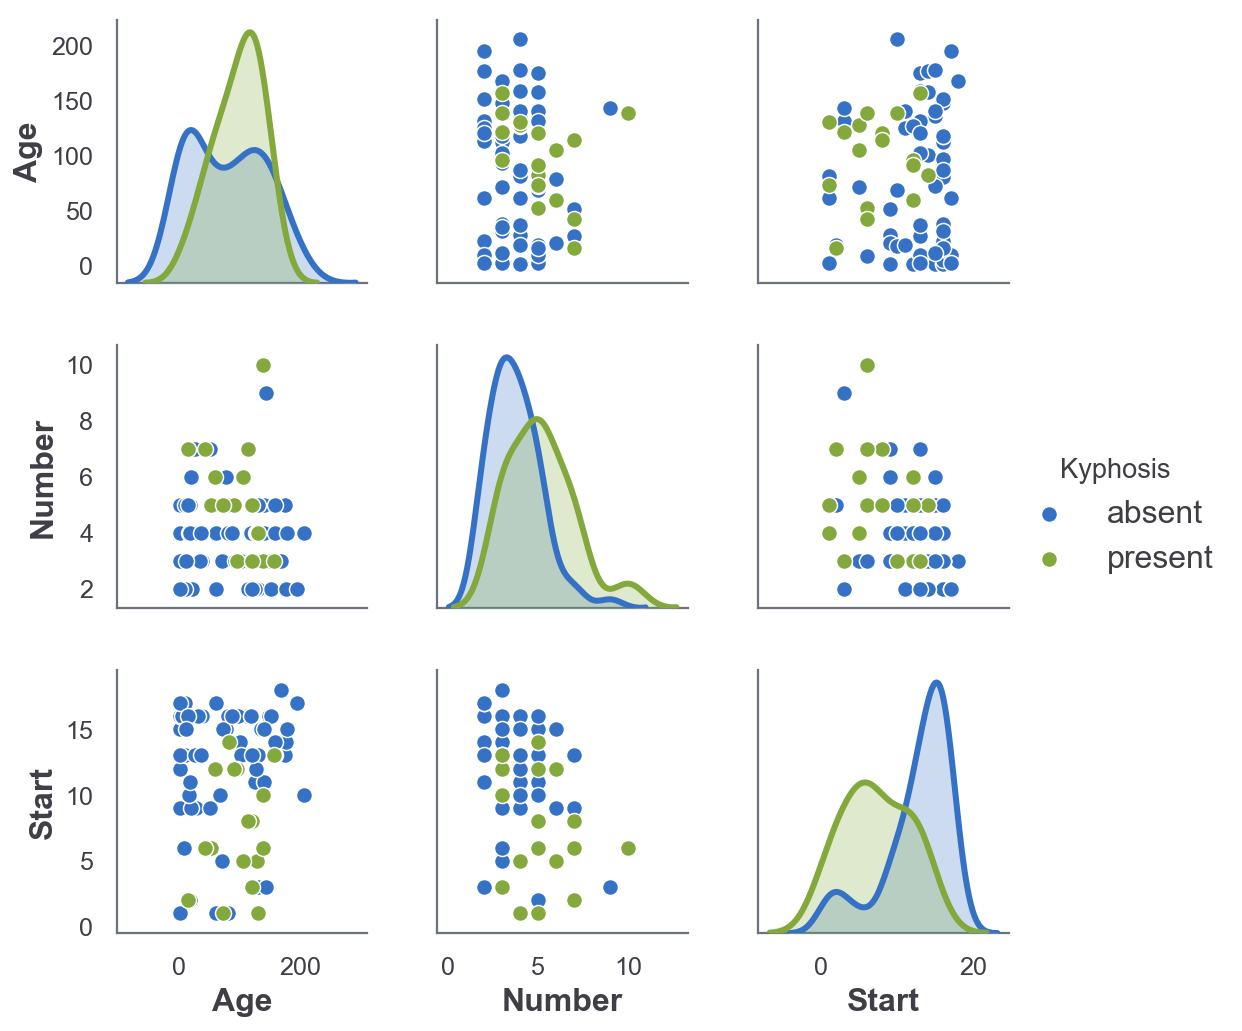

In [238]:
sns.pairplot(df, hue='Kyphosis')

In [244]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.94      0.68      0.79        22
     present       0.22      0.67      0.33         3

   micro avg       0.68      0.68      0.68        25
   macro avg       0.58      0.67      0.56        25
weighted avg       0.85      0.68      0.73        25

[[15  7]
 [ 1  2]]


In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.87      0.95      0.91        21
     present       0.50      0.25      0.33         4

   micro avg       0.84      0.84      0.84        25
   macro avg       0.68      0.60      0.62        25
weighted avg       0.81      0.84      0.82        25

[[20  1]
 [ 3  1]]


In [262]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

In [263]:
features = list(df.columns[1:])

In [264]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=features, filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

## Use Case

In [266]:
loans = pd.read_csv('./data/loan_data.csv')

Text(0.5, 0, 'FICO')

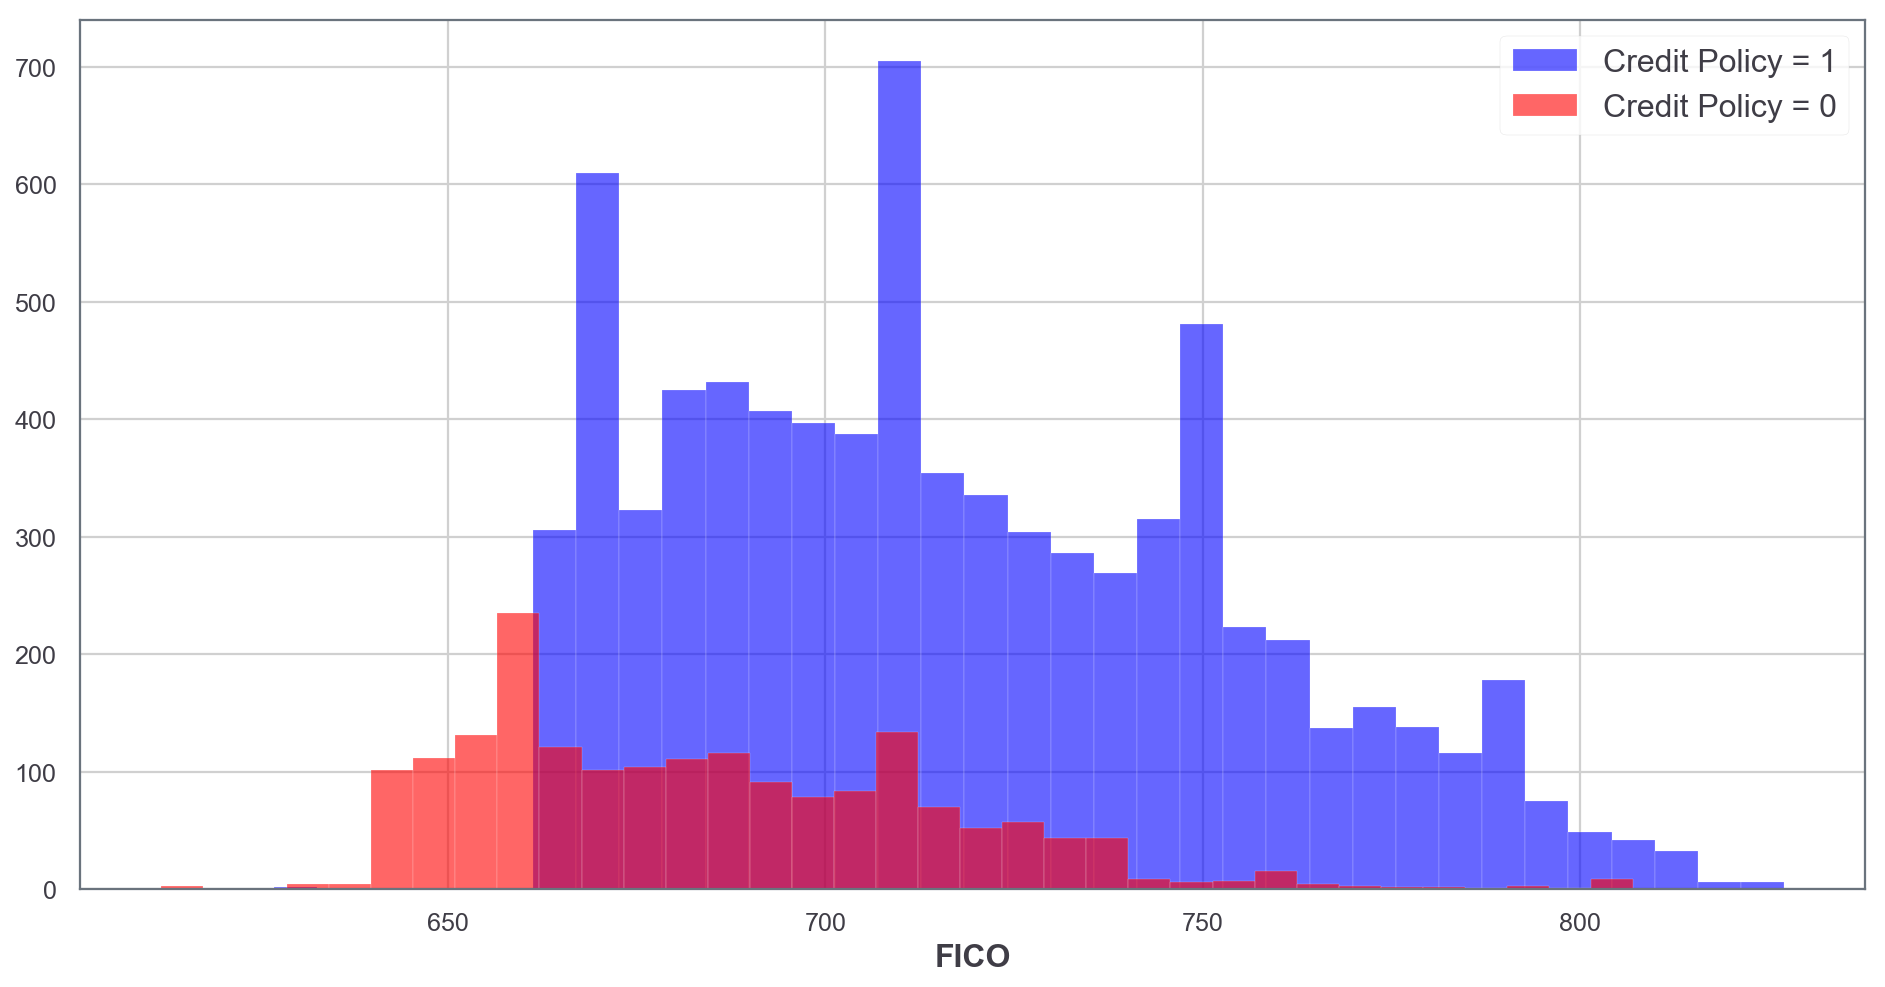

In [268]:
loans[loans['credit.policy']==1]['fico'].hist(bins=35, color='blue', 
                                              label='Credit Policy = 1',
                                              alpha=0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35, color='red', 
                                              label='Credit Policy = 0',
                                              alpha=0.6)
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

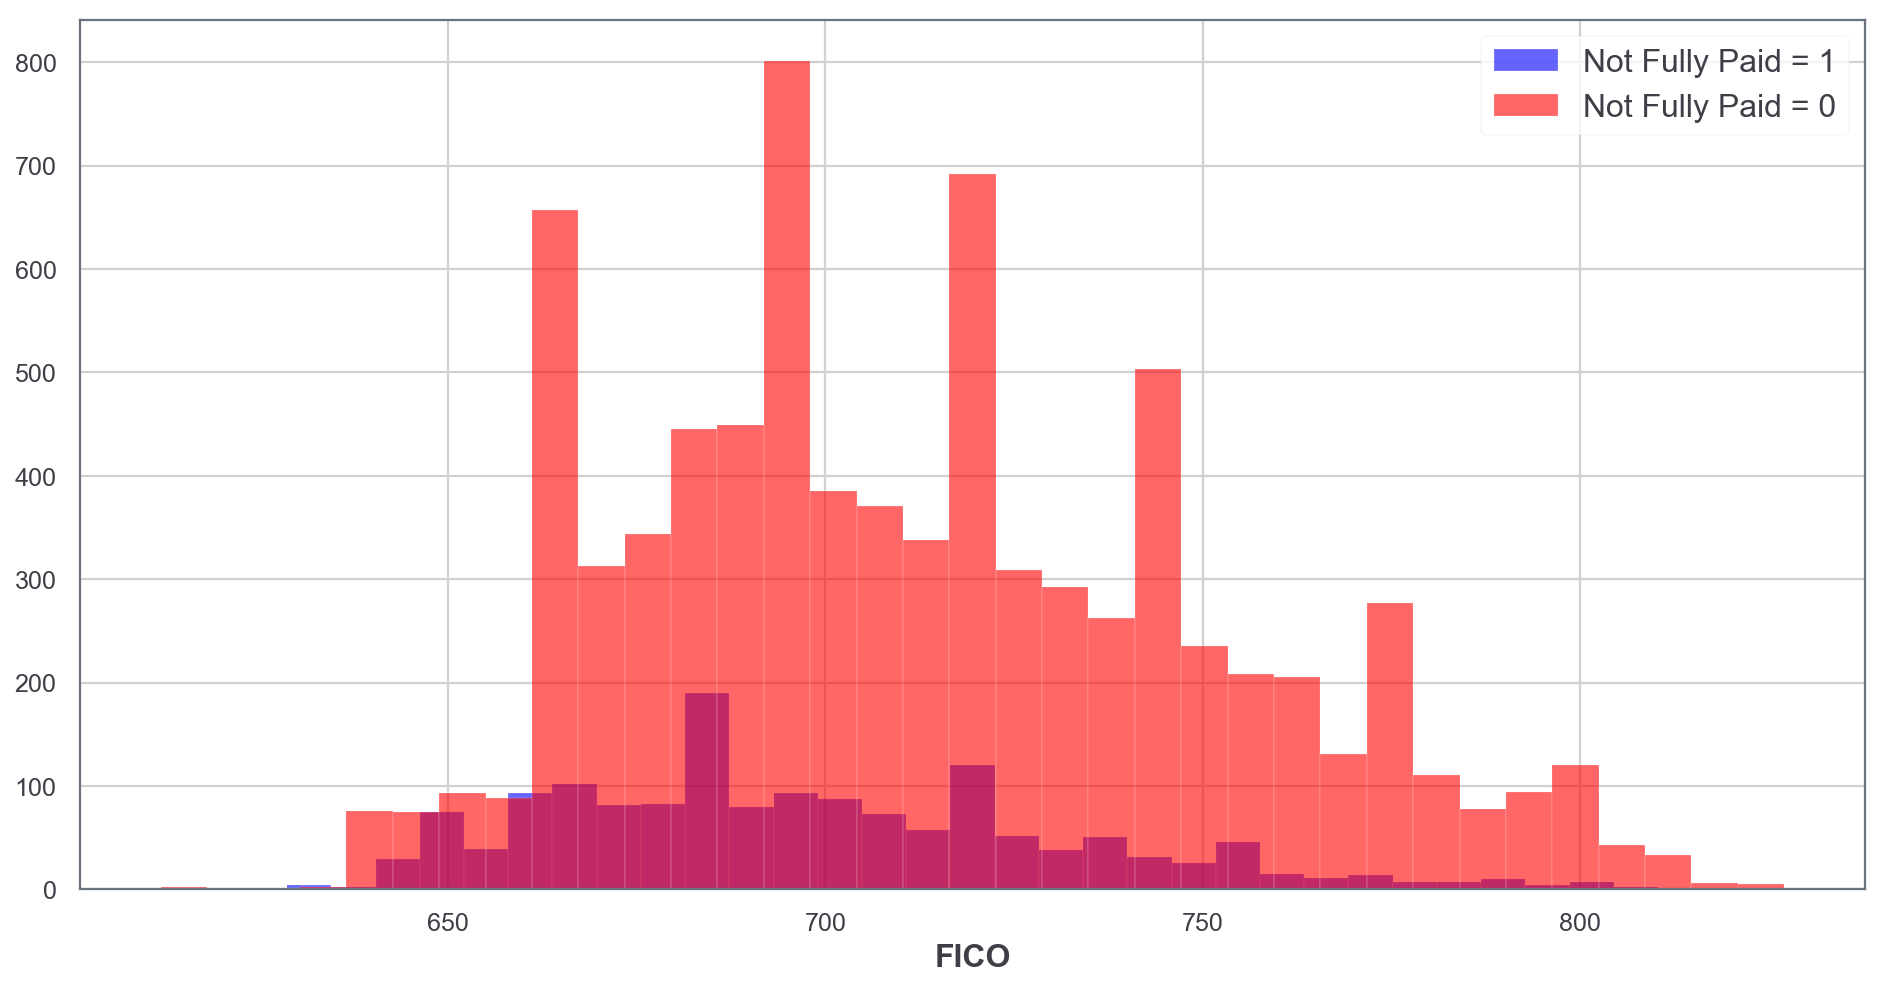

In [269]:
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35, color='blue', 
                                              label='Not Fully Paid = 1',
                                              alpha=0.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35, color='red', 
                                              label='Not Fully Paid = 0',
                                              alpha=0.6)
plt.legend()
plt.xlabel('FICO')

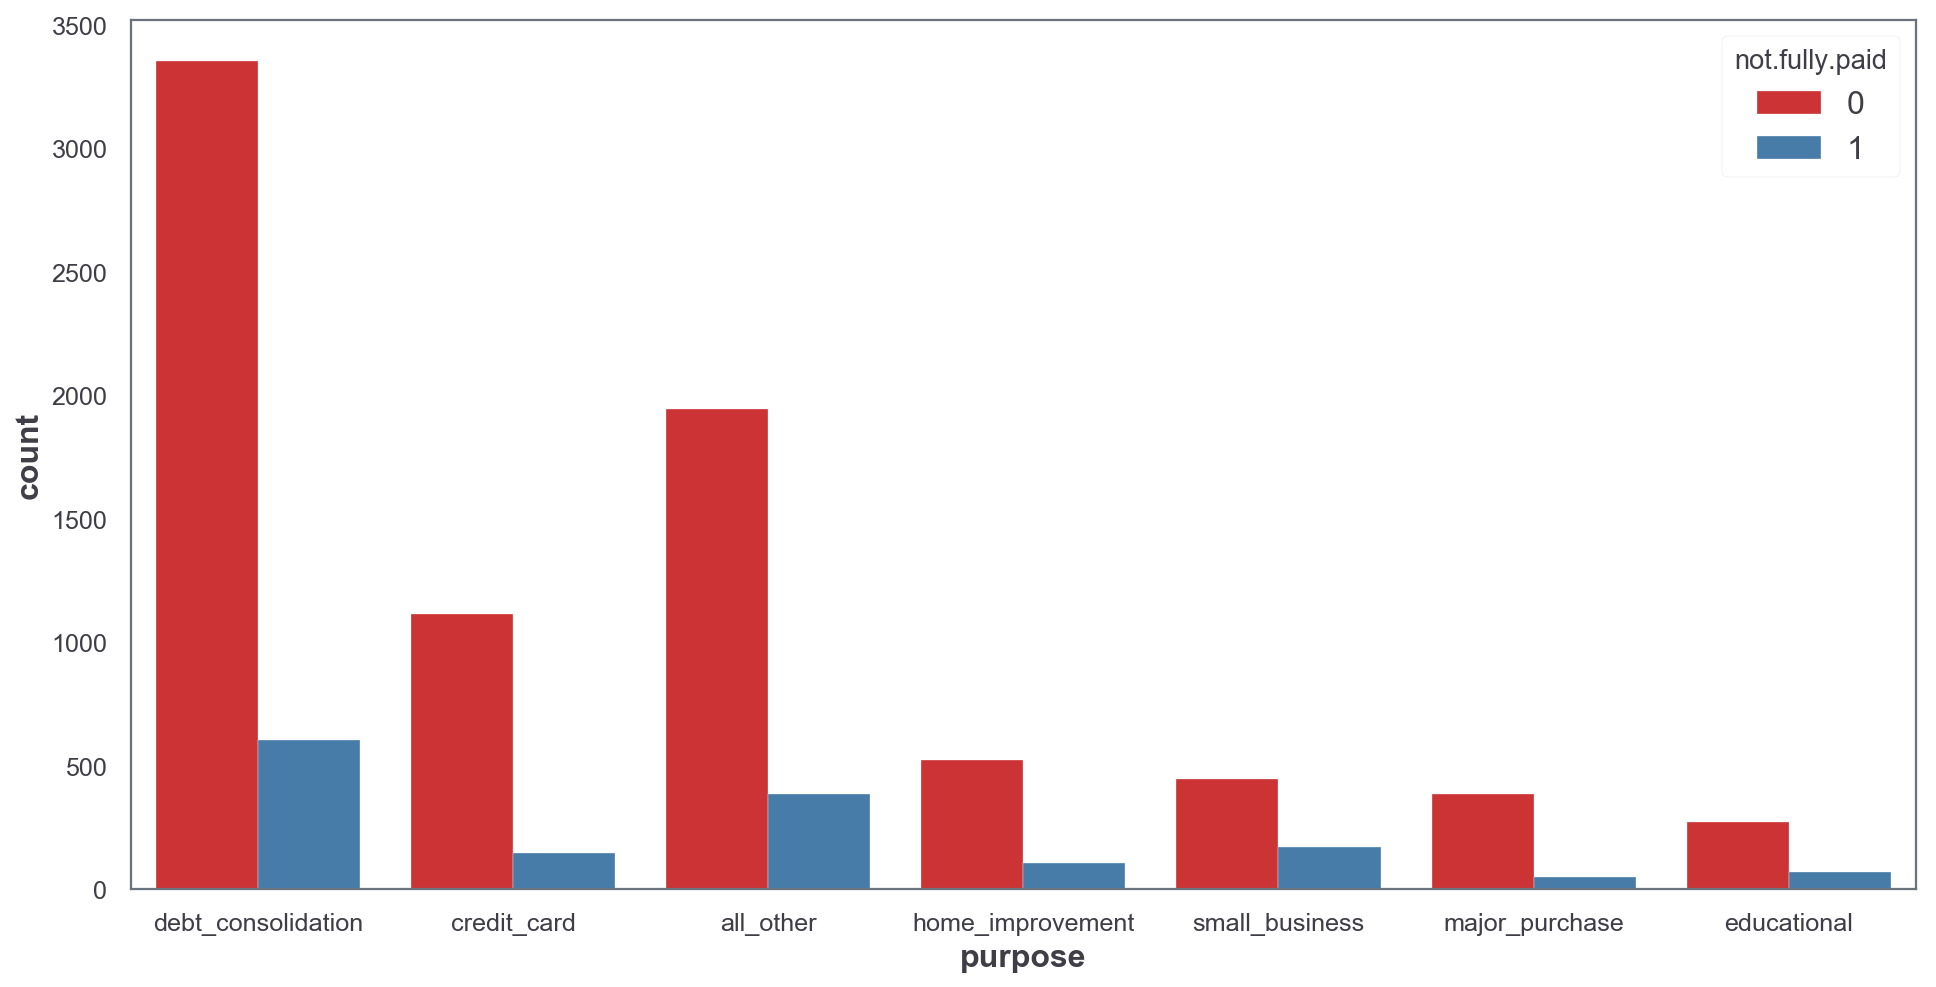

In [270]:
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette='Set1')

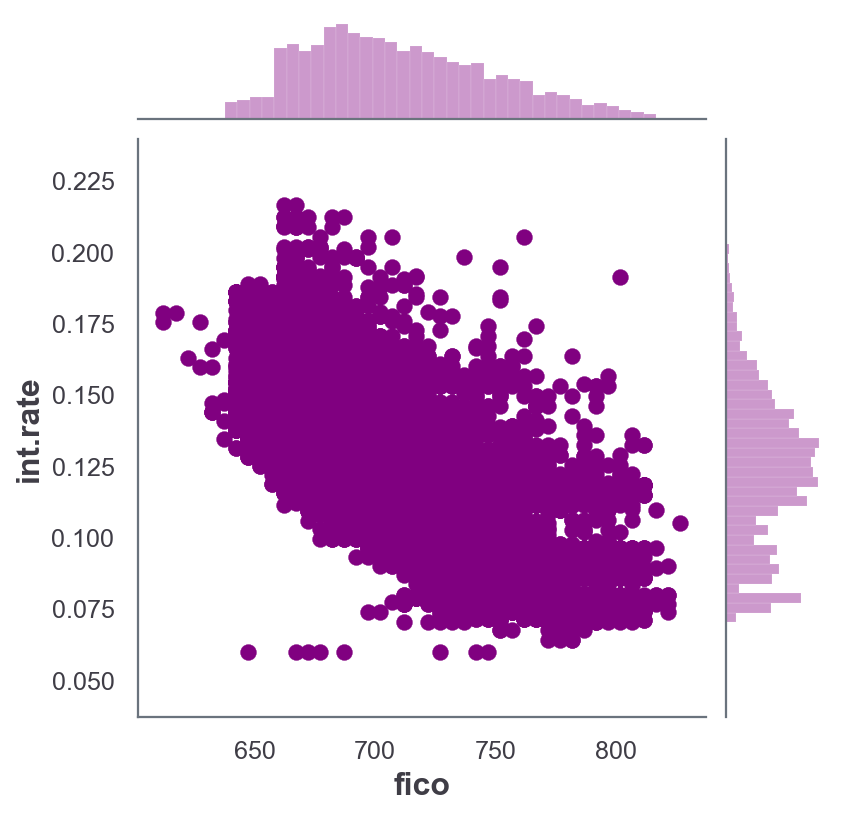

In [271]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

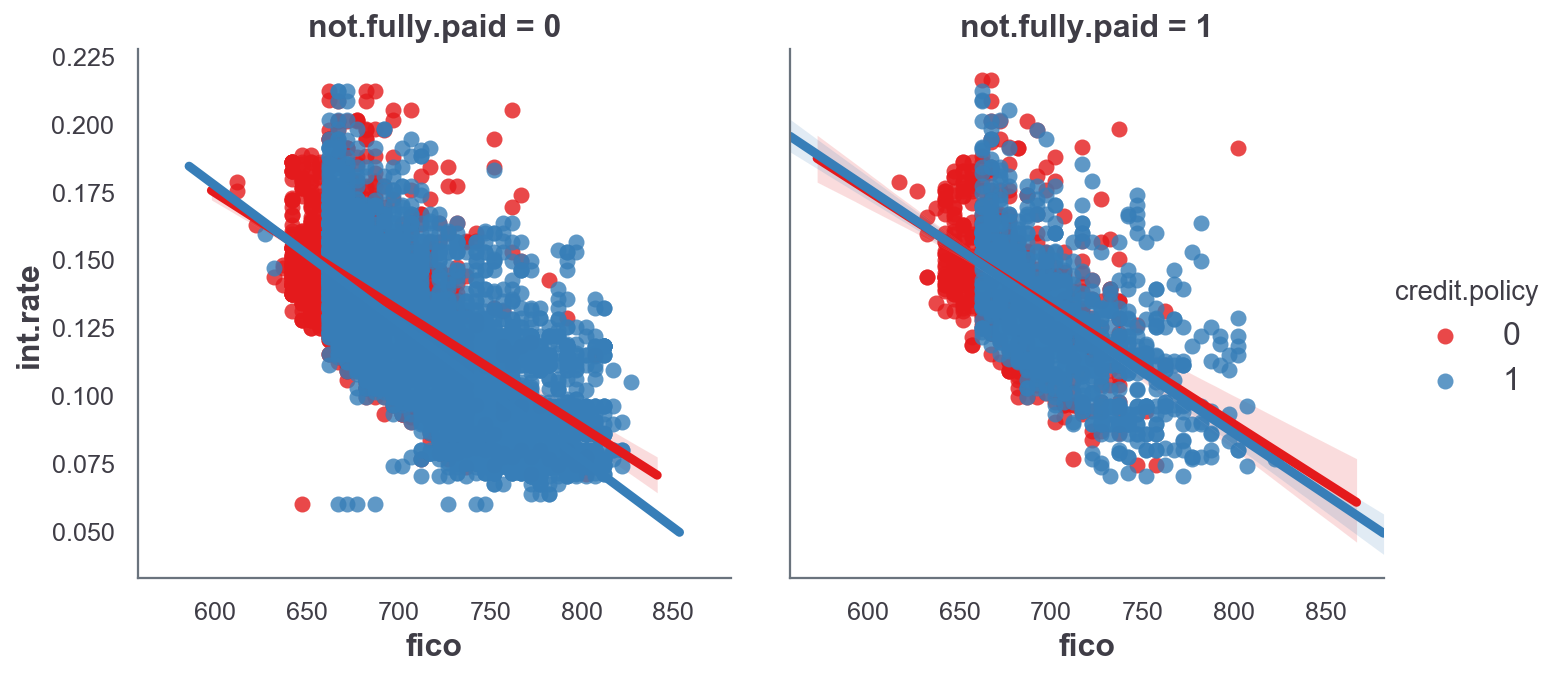

In [279]:
sns.lmplot(y='int.rate', x='fico', data=loans, hue='credit.policy',
           col='not.fully.paid', palette='Set1')

In [282]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [286]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.47      0.02      0.03       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

[[2422    9]
 [ 435    8]]


# SVM

In [299]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [288]:
cancer = load_breast_cancer()    # is json

In [295]:
df_feat = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [297]:
X = df_feat
y = cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

mdl = SVC()
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.60      1.00      0.75       102

   micro avg       0.60      0.60      0.60       171
   macro avg       0.30      0.50      0.37       171
weighted avg       0.36      0.60      0.45       171

[[  0  69]
 [  0 102]]


## Grid Search

In [308]:
param_grid = {'C': [0.1,1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(SVC(), param_grid, verbose=3)

grid.fit(X_train, y_train)

#grid.best_params_
#grid.best_estimator_

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6390977443609023, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6390977443609023, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6439393939393939, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6390977443609023, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.1, score=0.6390977443609023, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6439393939393939, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.6390977443609023, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.6390977443609023, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.6439393939393939, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.6390977443609023, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1, gamma=0.001, score=0.6390977443609023, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ..... C=1000, gamma=0.01, score=0.6390977443609023, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.6466165413533834, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.6439393939393939, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.8947368421052632, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.9172932330827067, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.9166666666666666, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.9172932330827067, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    2.5s finished


## Use Case

In [309]:
iris = sns.load_dataset('iris')

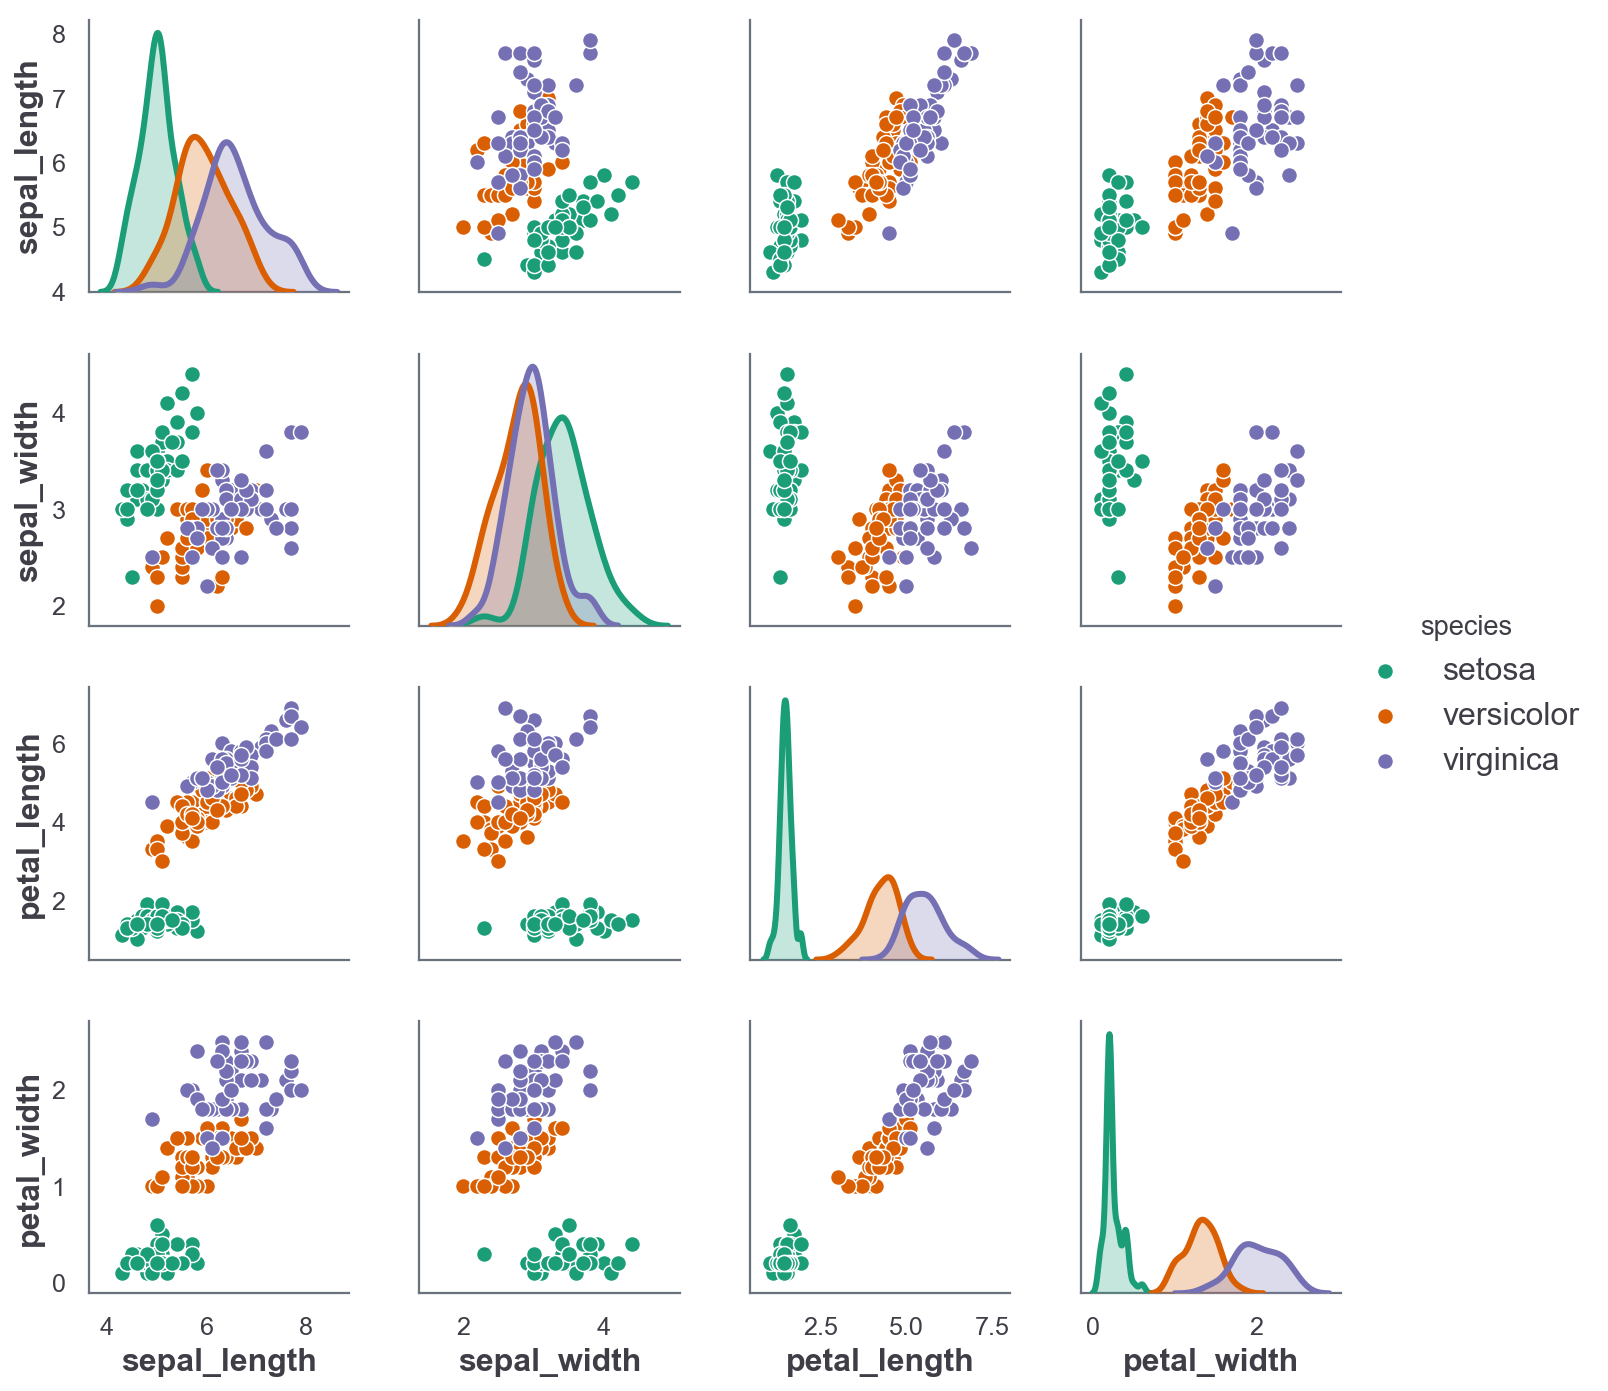

In [313]:
sns.pairplot(data=iris, hue='species', palette='Dark2')

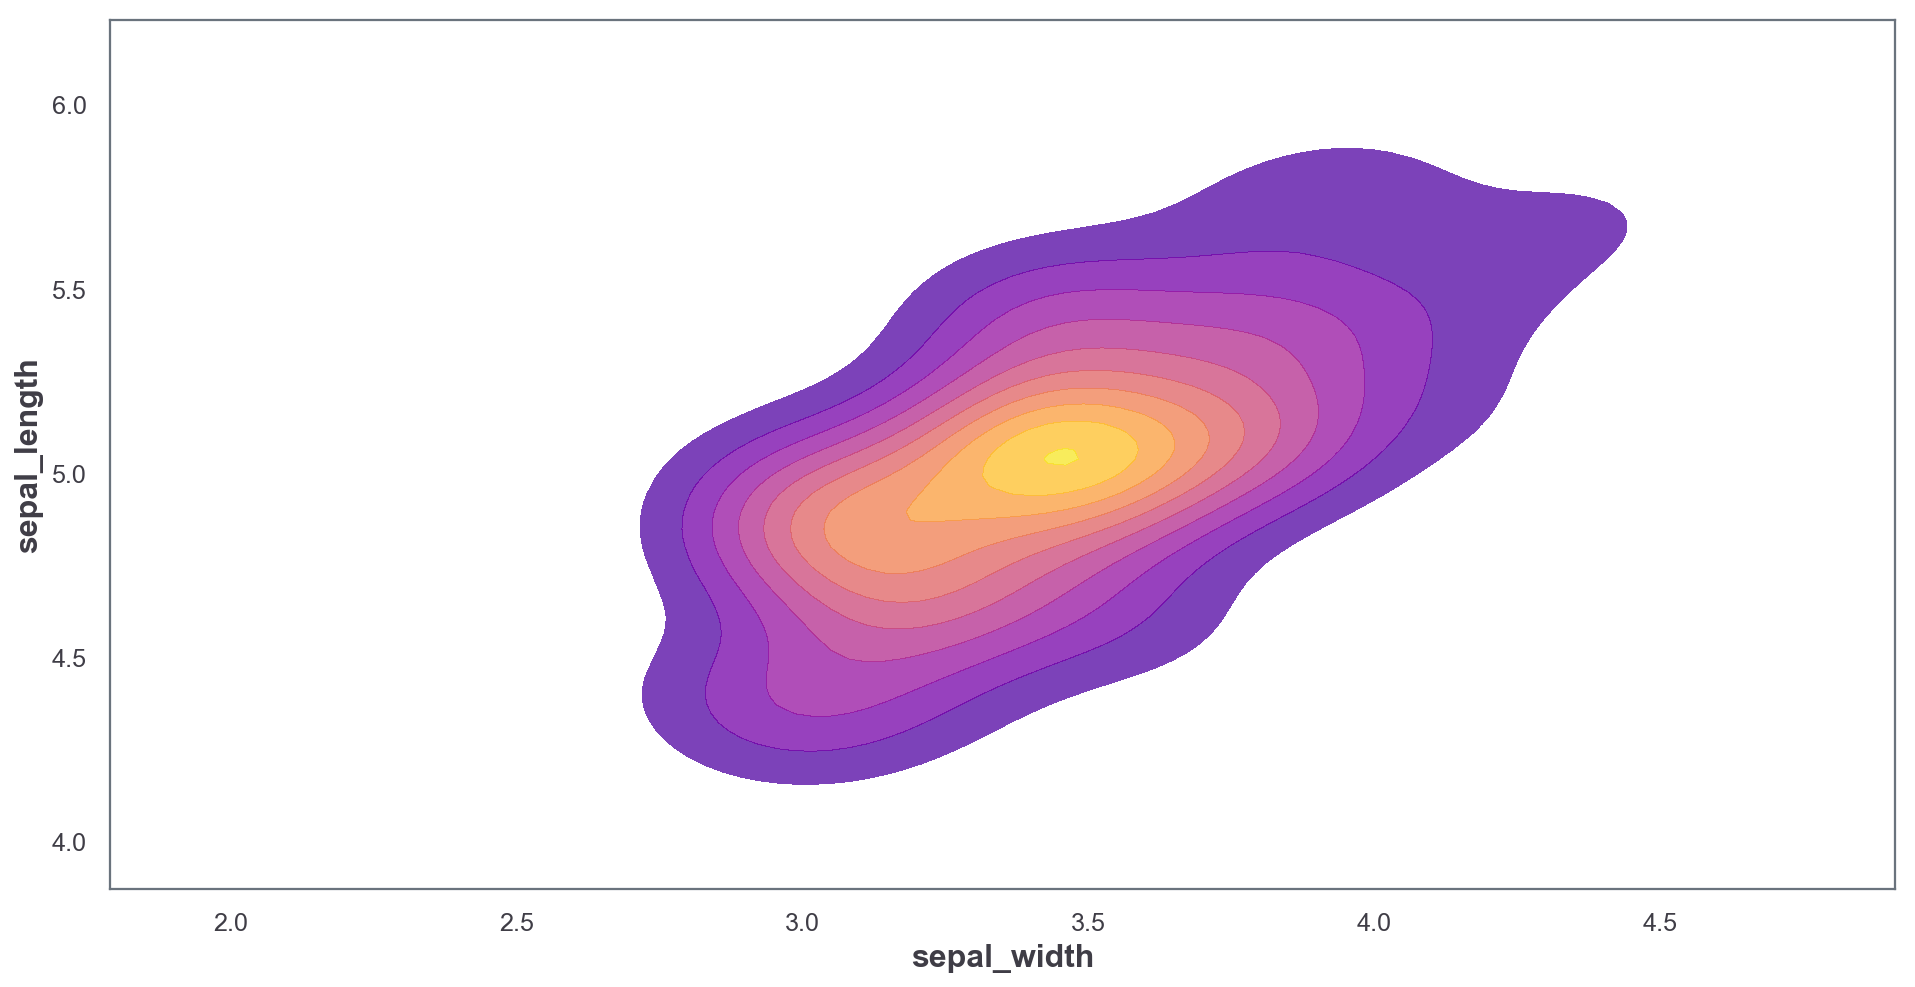

In [322]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap='plasma', shade=True, shade_lowest=False, alpha=0.75)

In [328]:
X = iris.drop('species', axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# grid search
param_grid = {'C': [0.1,1,10,100,1000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3) 
grid.fit(X_train, y_train)
#grid.best_params_
#grid.best_estimator_

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.9444444444444444, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ........................ C=0.1, gamma=1, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8823529411764706, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8333333333333334, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7428571428571429, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7941176470588235, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.9714285714285714, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.9117647058823529, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8888888888888888, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9714285714285714, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8529411764705882, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.3611111111111111, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ...... C=1, gamma=0.001, score=0.37142857142857144, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.6s finished


# KMeans

In [332]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [330]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

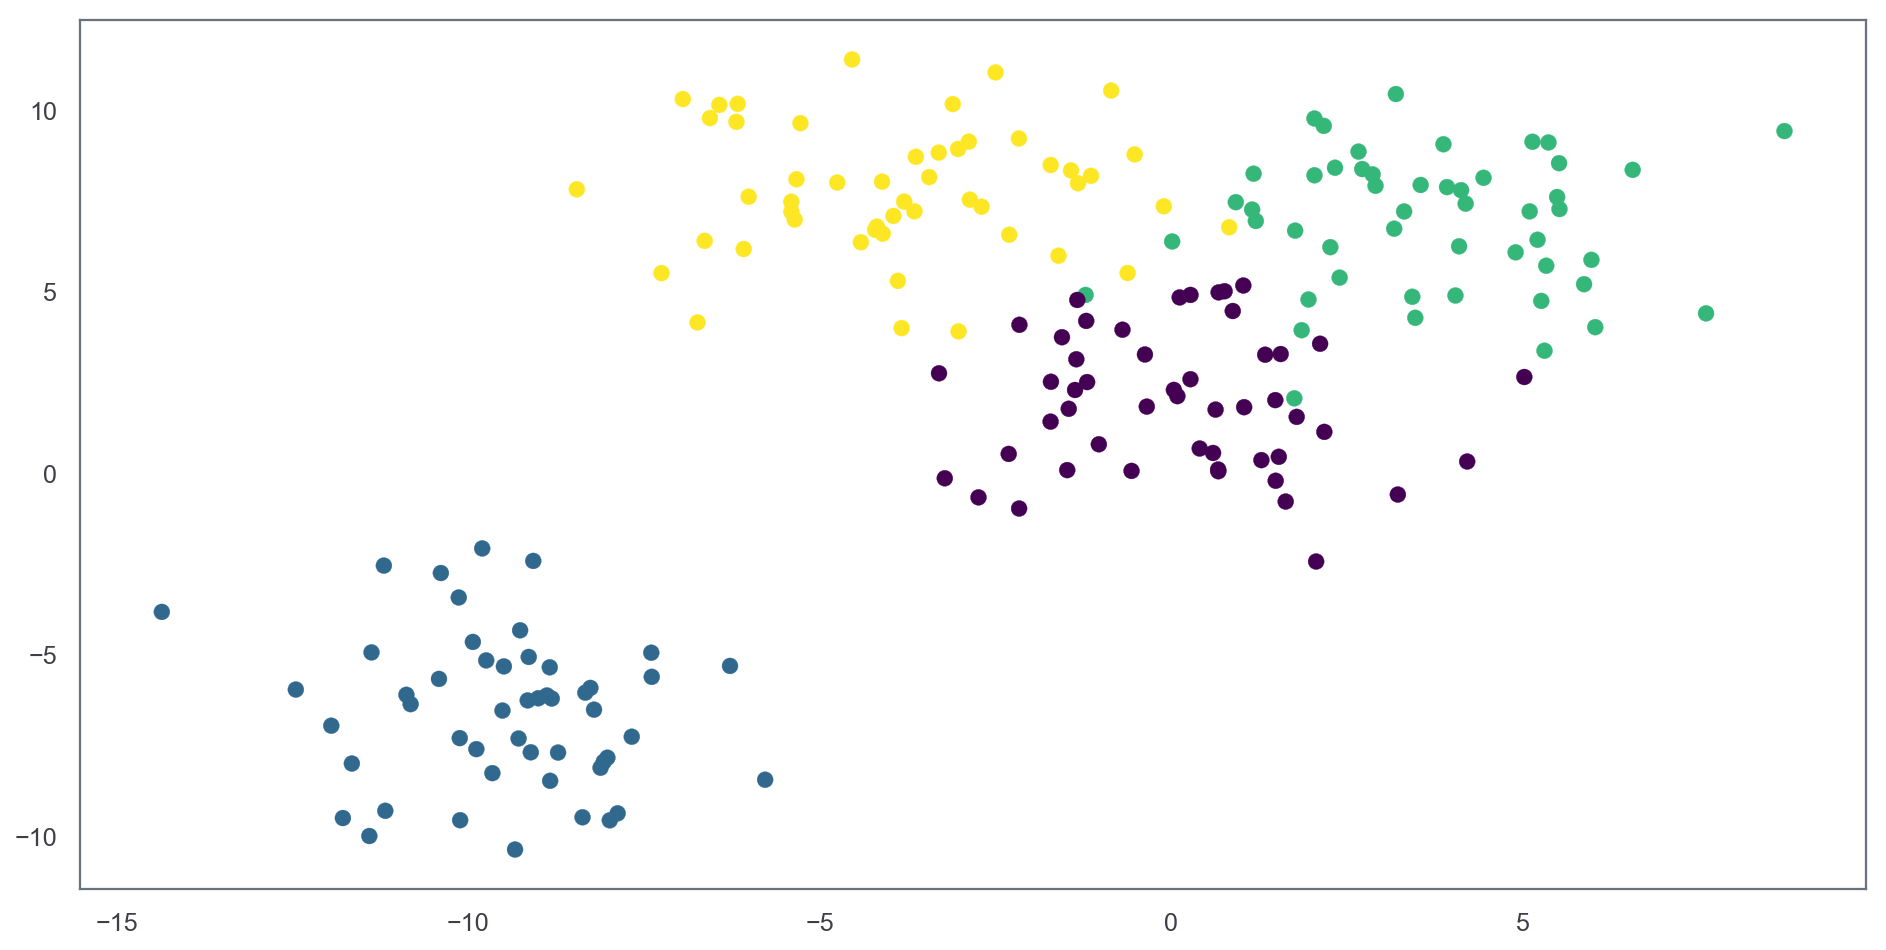

In [337]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')

In [339]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[0])

#k means.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

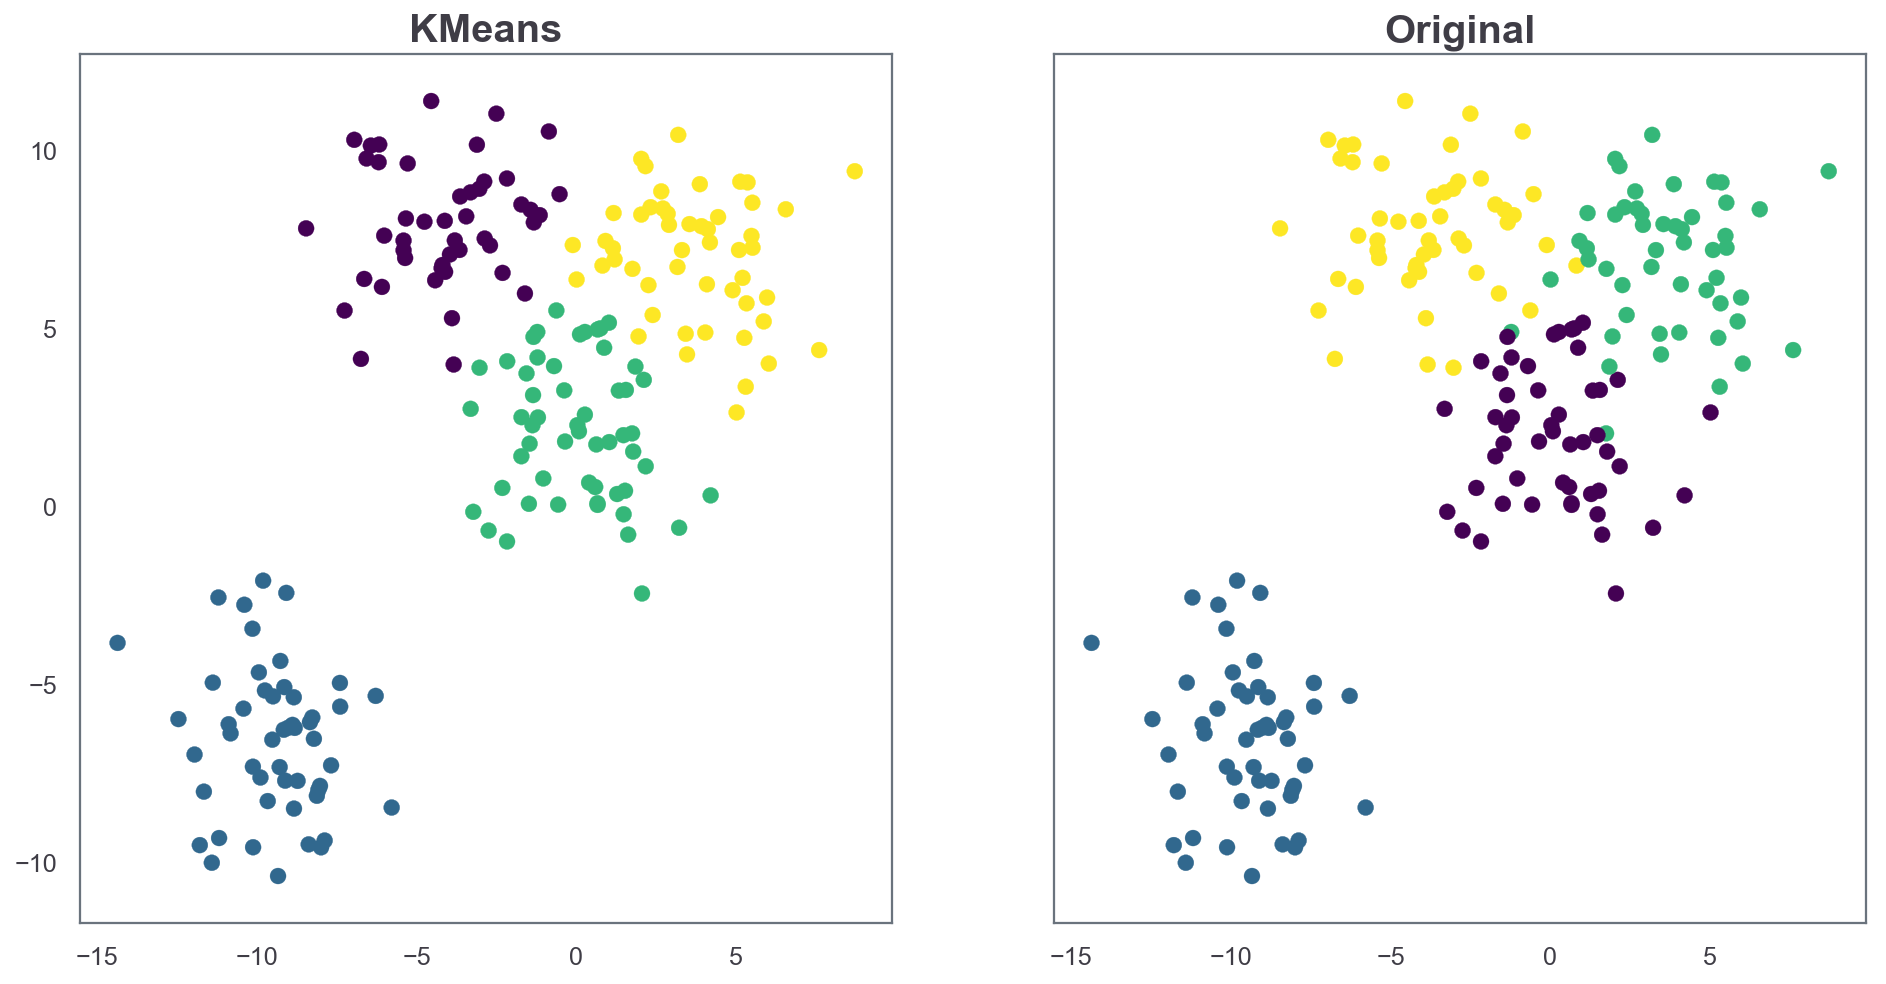

In [342]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

ax1.set_title('KMeans')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='viridis')

ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')

## Use Case

In [372]:
df = pd.read_csv('./data/College_Data', index_col=0)

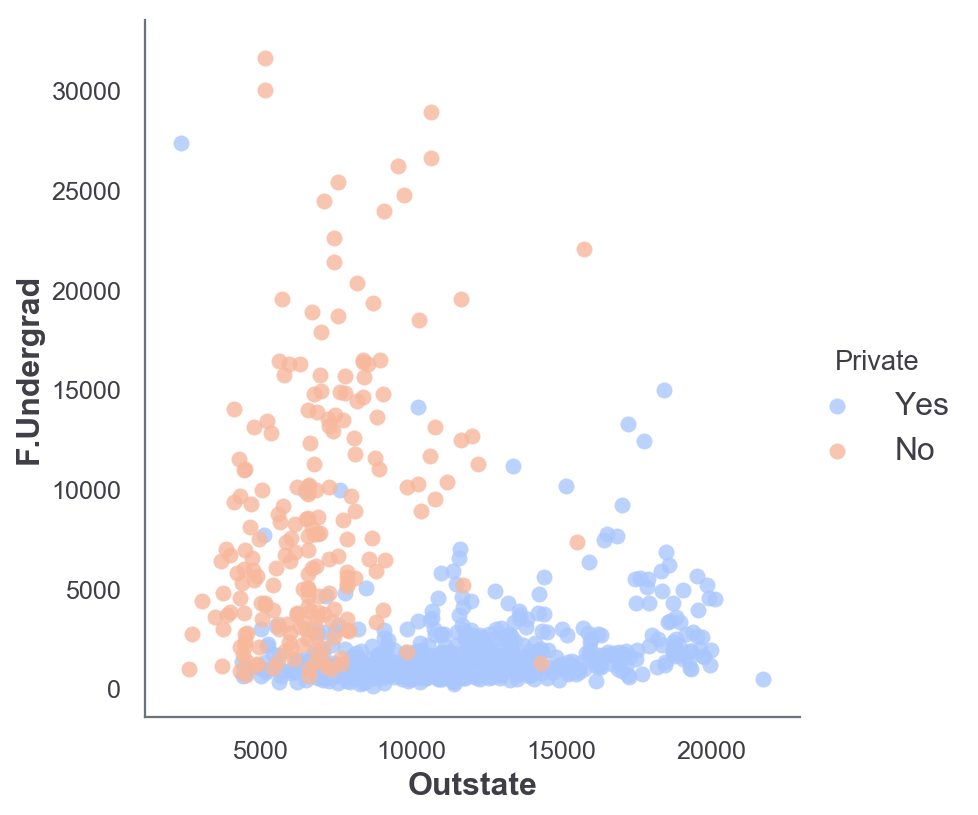

In [373]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=df, hue='Private', fit_reg=False, palette='coolwarm', size=6, aspect=1)

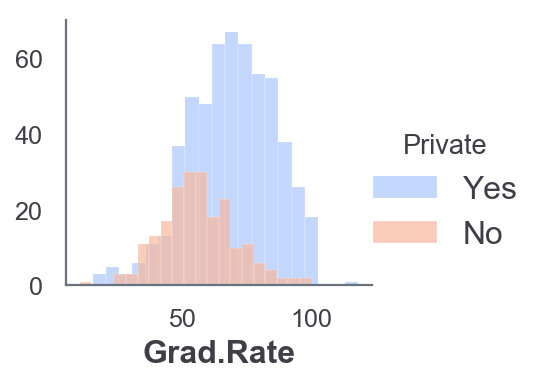

In [374]:
g = sns.FacetGrid(df, hue='Private', palette='coolwarm')
g = g.map(plt.hist, 'Grad.Rate',  bins=20, alpha=0.7)
g.add_legend()

In [375]:
df[df['Grad.Rate']>100]

Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
Cazenovia College     Yes  3847    3433     527          9         35   

                   F.Undergrad  P.Undergrad  ...  Books  Personal  PhD  \
Cazenovia College         1010           12  ...    600       500   22   

                   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Cazenovia College        47   14.30000           20    7697        118  

[1 rows x 18 columns]

In [376]:
df['Grad.Rate']['Cazenovia College'] = 100

In [377]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('Private', axis=1))
kmeans.cluster_centers_

array([[ 1813.23468,  1287.16592,   491.04484,    25.30942,    53.47085,
         2188.54858,   595.45889, 10395.70852,  4311.36472,   541.98206,
         1280.33632,    70.44245,    77.82511,    14.0997 ,    23.17489,
         8932.04634,    65.09268],
       [10363.13889,  6550.89815,  2569.72222,    41.49074,    70.2037 ,
        13061.93519,  2464.86111, 10719.17593,  4643.47222,   595.21296,
         1714.2037 ,    86.39815,    91.33333,    14.02778,    20.07407,
        14170.5    ,    67.59259]])

In [378]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0

In [379]:
df['Cluster'] = df['Private'].apply(converter)

In [380]:
print(classification_report(df['Cluster'], kmeans.labels_))
print(confusion_matrix(df['Cluster'], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

   micro avg       0.22      0.22      0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

[[138  74]
 [531  34]]


# Principal Component Analysis

In [407]:
from sklearn.decomposition import PCA

In [413]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [414]:
pca = PCA(n_components=2)

In [415]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [416]:
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

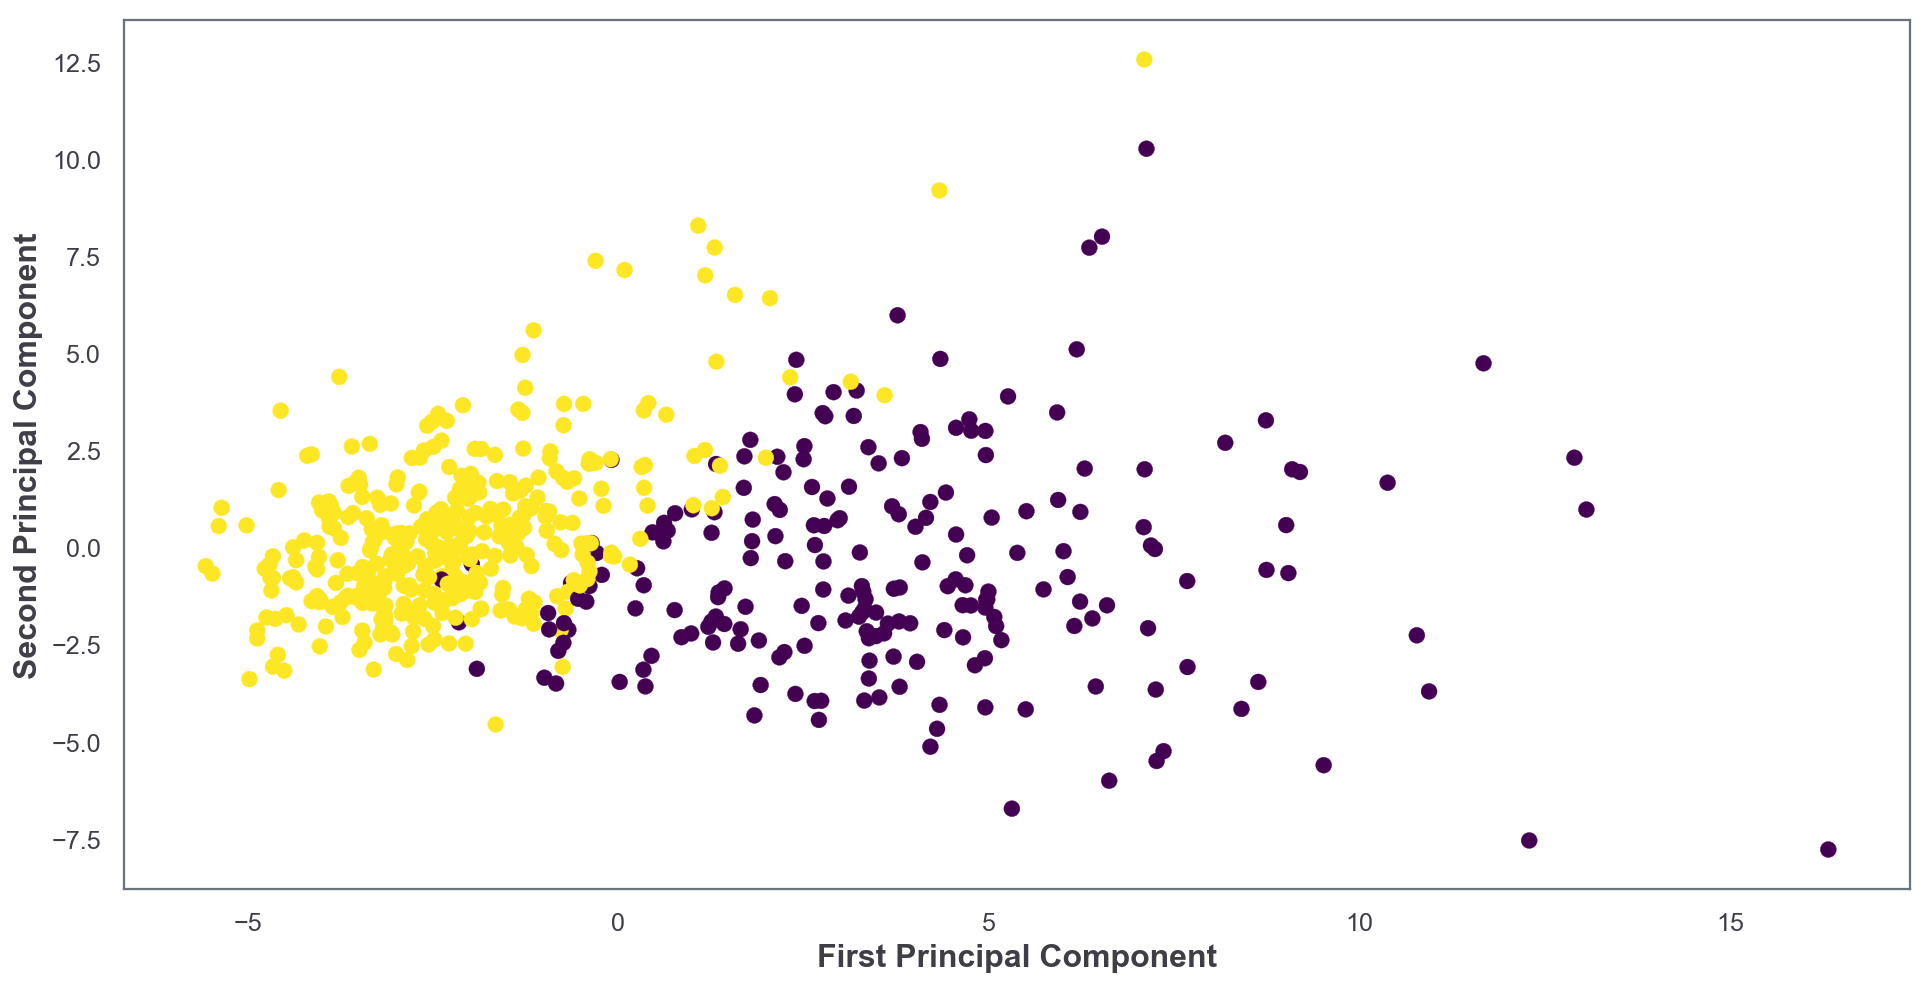

In [417]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

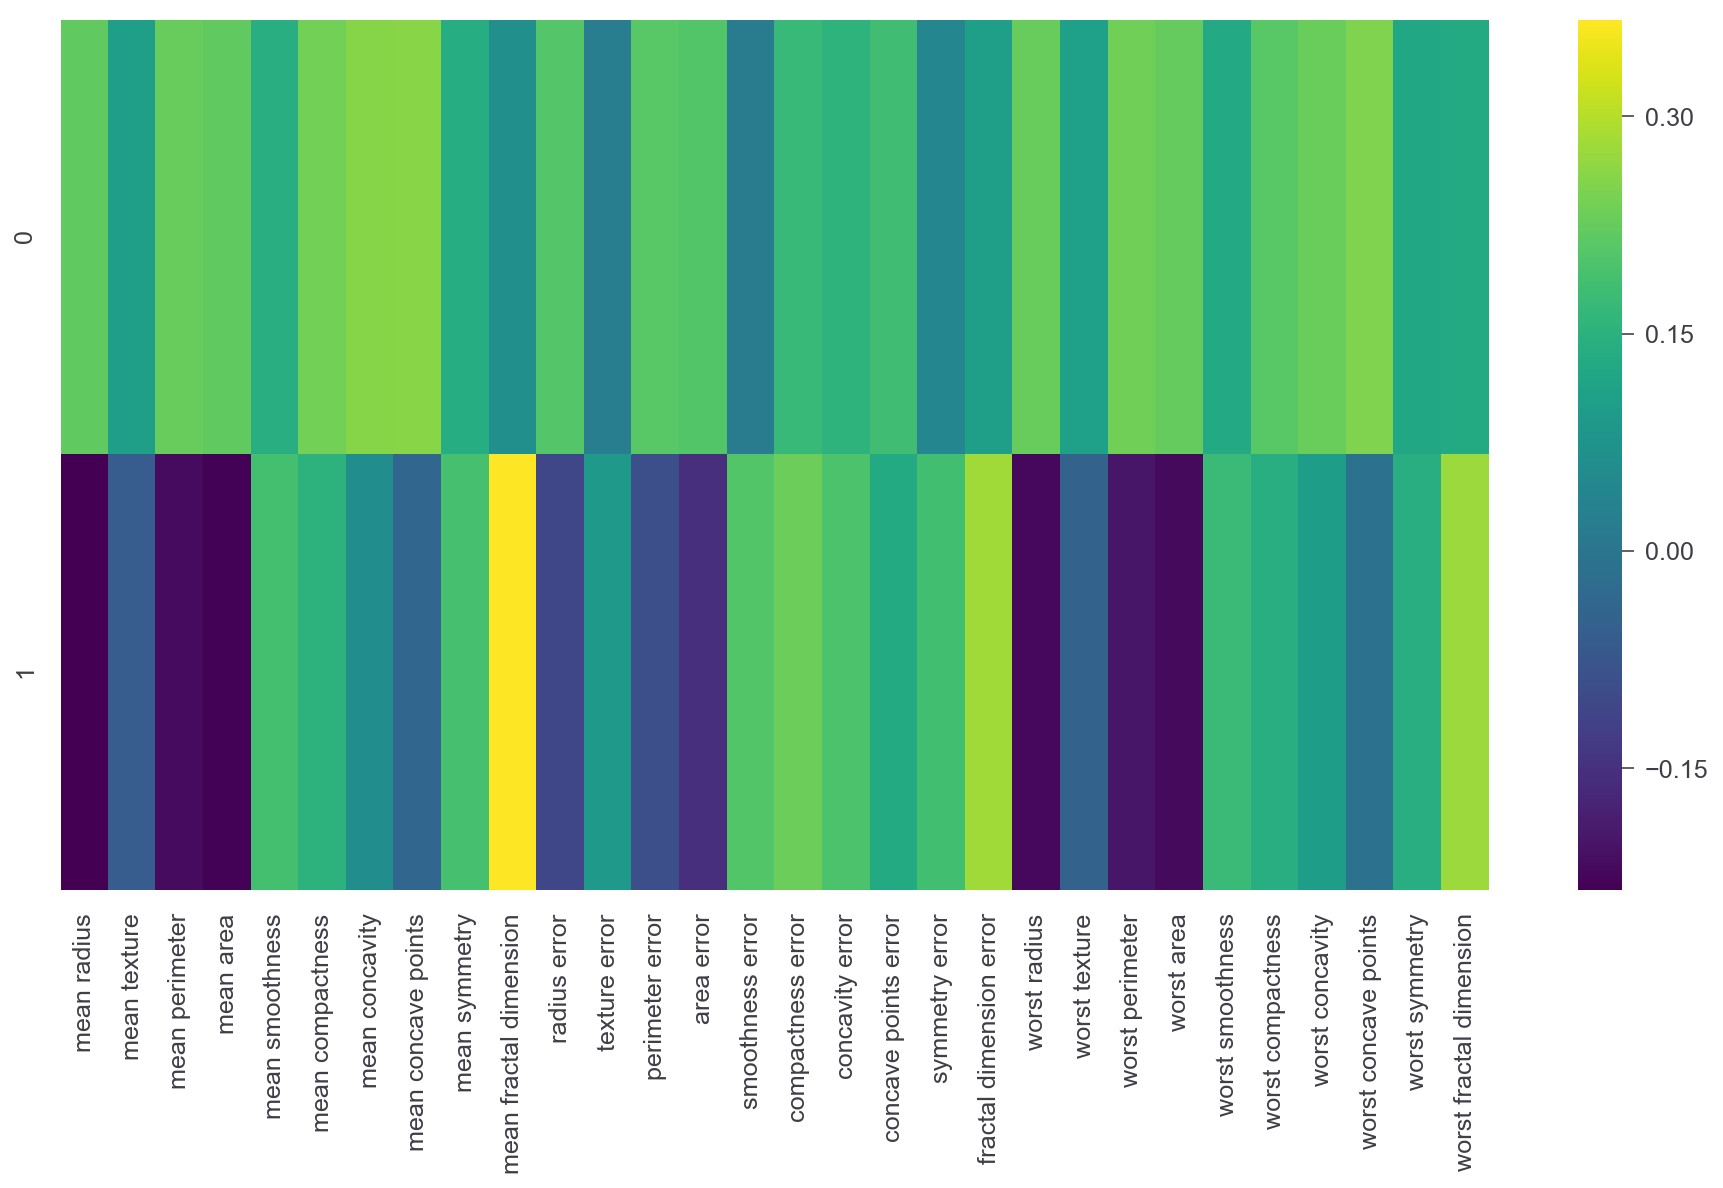

In [420]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
sns.heatmap(df_comp, cmap='viridis')

# Recommender Systems

In [424]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

df = pd.read_csv('./data/u.data', sep='\t', names=column_names)

In [425]:
movie_titles = pd.read_csv('./data/Movie_Id_Titles')

In [426]:
df = pd.merge(df, movie_titles, on='item_id')

In [428]:
sns.set_style('white')

In [430]:
df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)           5.00000
Prefontaine (1997)                                  5.00000
Santa with Muscles (1996)                           5.00000
Star Kid (1997)                                     5.00000
Someone Else's America (1995)                       5.00000
Entertaining Angels: The Dorothy Day Story (1996)   5.00000
Saint of Fort Washington, The (1993)                5.00000
Great Day in Harlem, A (1994)                       5.00000
                                                      ...  
Somebody to Love (1994)                             1.00000
Invitation, The (Zaproszenie) (1986)                1.00000
Lotto Land (1995)                                   1.00000
Touki Bouki (Journey of the Hyena) (1973)           1.00000
JLG/JLG - autoportrait de décembre (1994)           1.00000
Daens (1992)                                        1.00000
Butterfly Kiss (1995)                               1.00000
Eye of Vichy, The (Oeil de Vichy, 

In [431]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
English Patient, The (1996)                   481
Scream (1996)                                 478
Toy Story (1995)                              452
                                             ... 
Big Bang Theory, The (1994)                     1
Mad Dog Time (1996)                             1
Mamma Roma (1962)                               1
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [433]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [436]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

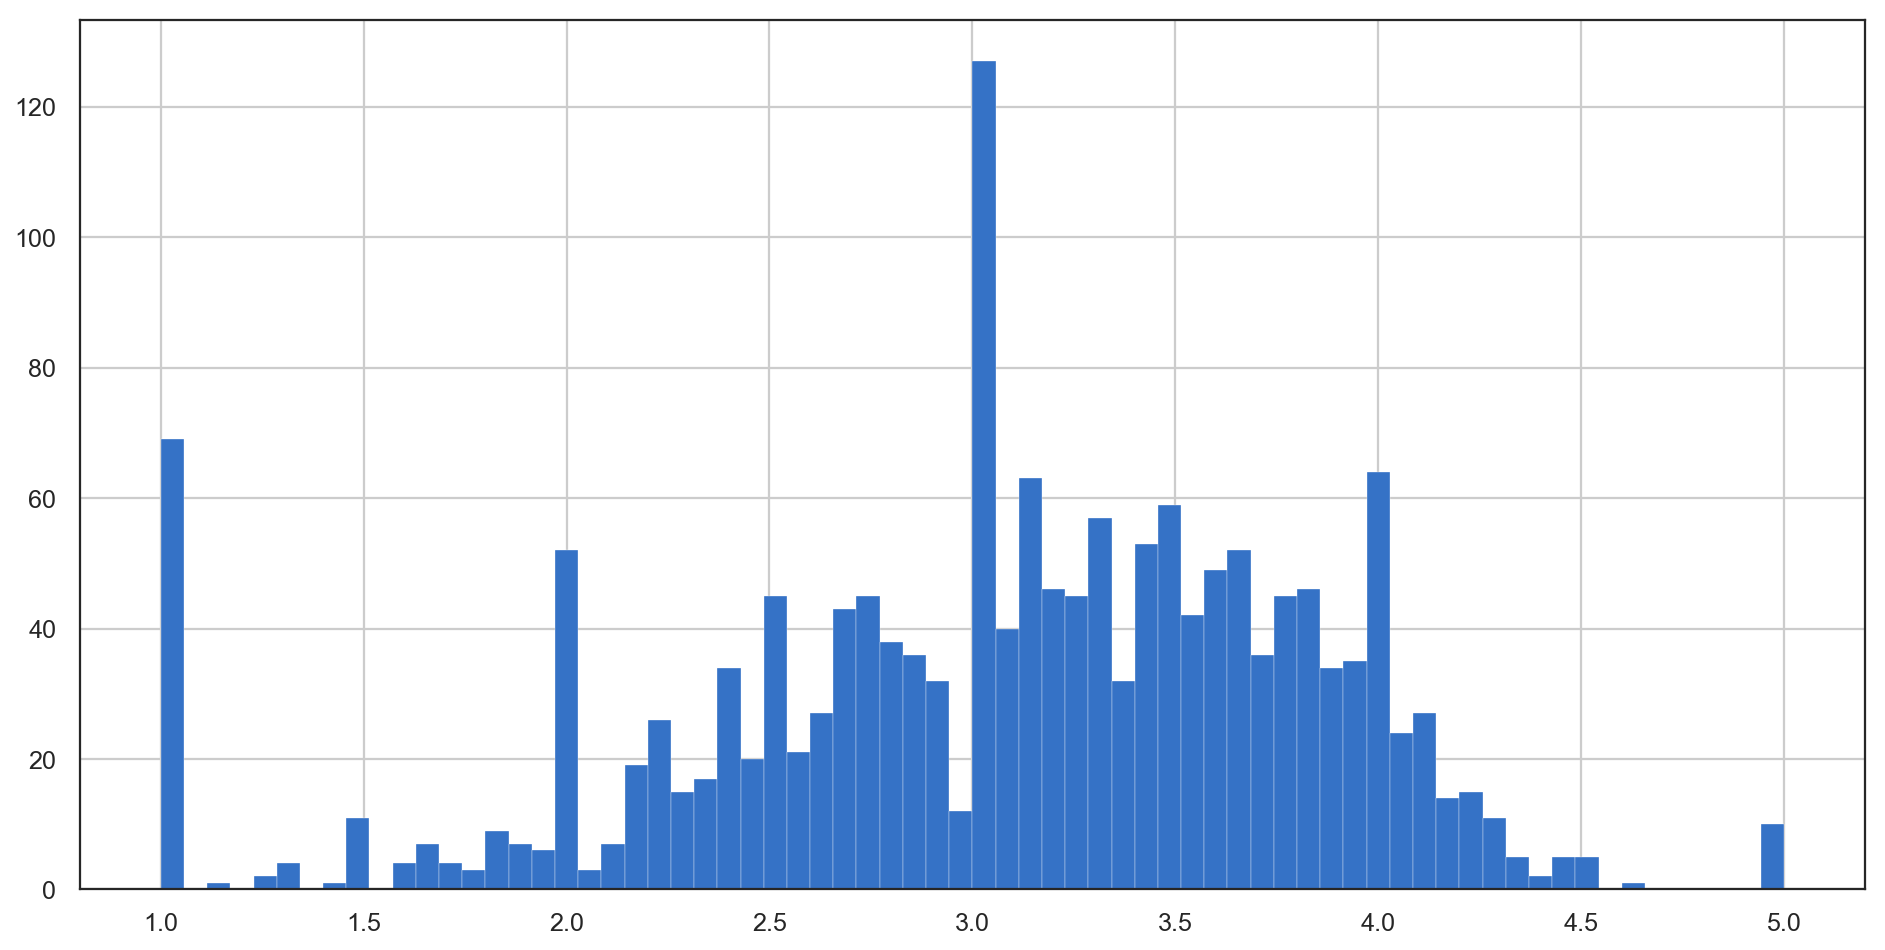

In [439]:
ratings['rating'].hist(bins=70)

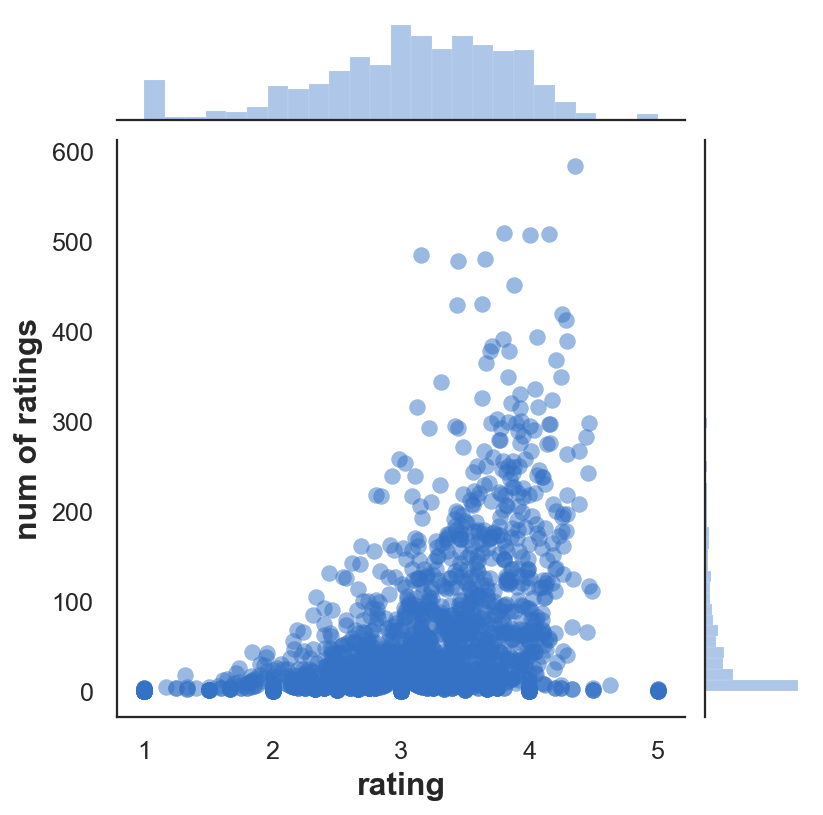

In [440]:
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5)

In [441]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

In [444]:
ratings.sort_values('num of ratings', ascending=False)

rating  num of ratings
title                                                     
Star Wars (1977)                   4.35959             584
Contact (1997)                     3.80354             509
Fargo (1996)                       4.15551             508
Return of the Jedi (1983)          4.00789             507
Liar Liar (1997)                   3.15670             485
English Patient, The (1996)        3.65696             481
Scream (1996)                      3.44142             478
Toy Story (1995)                   3.87832             452
...                                    ...             ...
Hana-bi (1997)                     3.00000               1
Object of My Affection, The (1998) 4.00000               1
Office Killer (1997)               1.00000               1
Great Day in Harlem, A (1994)      5.00000               1
Other Voices, Other Rooms (1997)   3.00000               1
Good Morning (1971)                1.00000               1
Girls Town (1996)                  3.00000               1
Á köldum klaka (Cold Fever) (1994) 3.00000               1

[1664 rows x 2 columns]

In [457]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [458]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [459]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [460]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [461]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending=False)

Correlation  \
title                                                             
Star Wars (1977)                                        1.00000   
Empire Strikes Back, The (1980)                         0.74835   
Return of the Jedi (1983)                               0.67256   
Raiders of the Lost Ark (1981)                          0.53612   
Austin Powers: International Man of Mystery (1997)      0.37743   
Sting, The (1973)                                       0.36754   
Indiana Jones and the Last Crusade (1989)               0.35011   
Pinocchio (1940)                                        0.34787   
...                                                         ...   
In the Name of the Father (1993)                       -0.11939   
Little Women (1994)                                    -0.12105   
Kiss the Girls (1997)                                  -0.12219   
Edge, The (1997)                                       -0.12717   
As Good As It Gets (1997)                              -0.13047   
Crash (1996)                                           -0.14851   
G.I. Jane (1997)                                       -0.17673   
First Wives Club, The (1996)                           -0.19450   

                                                    num of ratings  
title                                                               
Star Wars (1977)                                               584  
Empire Strikes Back, The (1980)                                368  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130  
Sting, The (1973)                                              241  
Indiana Jones and the Last Crusade (1989)                      331  
Pinocchio (1940)                                               101  
...                                                            ...  
In the Name of the Father (1993)                               102  
Little Women (1994)                                            102  
Kiss the Girls (1997)                                          143  
Edge, The (1997)                                               113  
As Good As It Gets (1997)                                      112  
Crash (1996)                                                   128  
G.I. Jane (1997)                                               175  
First Wives Club, The (1996)                                   160  

[334 rows x 2 columns]

In [463]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['Correlation'])
corr_liarliar.dropna(inplace=True)

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending=False)

Correlation  \
title                                                             
Liar Liar (1997)                                        1.00000   
Batman Forever (1995)                                   0.51697   
Mask, The (1994)                                        0.48465   
Down Periscope (1996)                                   0.47268   
Con Air (1997)                                          0.46983   
Pretty Woman (1990)                                     0.46979   
101 Dalmatians (1996)                                   0.46976   
Michael (1996)                                          0.44202   
...                                                         ...   
Crying Game, The (1992)                                -0.16012   
Brazil (1985)                                          -0.16126   
Conan the Barbarian (1981)                             -0.16708   
Hoop Dreams (1994)                                     -0.18450   
Ed Wood (1994)                                         -0.19948   
Dr. Strangelove or: How I Learned to Stop Worry...     -0.23809   
Welcome to the Dollhouse (1995)                        -0.25423   
Raging Bull (1980)                                     -0.30813   

                                                    num of ratings  
title                                                               
Liar Liar (1997)                                               485  
Batman Forever (1995)                                          114  
Mask, The (1994)                                               129  
Down Periscope (1996)                                          101  
Con Air (1997)                                                 137  
Pretty Woman (1990)                                            164  
101 Dalmatians (1996)                                          109  
Michael (1996)                                                 119  
...                                                            ...  
Crying Game, The (1992)                                        119  
Brazil (1985)                                                  208  
Conan the Barbarian (1981)                                     107  
Hoop Dreams (1994)                                             117  
Ed Wood (1994)                                                 133  
Dr. Strangelove or: How I Learned to Stop Worry...             194  
Welcome to the Dollhouse (1995)                                112  
Raging Bull (1980)                                             116  

[334 rows x 2 columns]

# Natural Language Processing

In [464]:
import nltk

In [465]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\dacatay\AppData\Roaming\nltk_data...
      Unzipping corpora\stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [468]:
messages = [line.rstrip() for line in open('./data/smsspamcollection/SMSSpamCollection')]

In [481]:
messages = pd.read_csv('./data/smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [482]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [485]:
messages['length'] = messages['message'].apply(len)

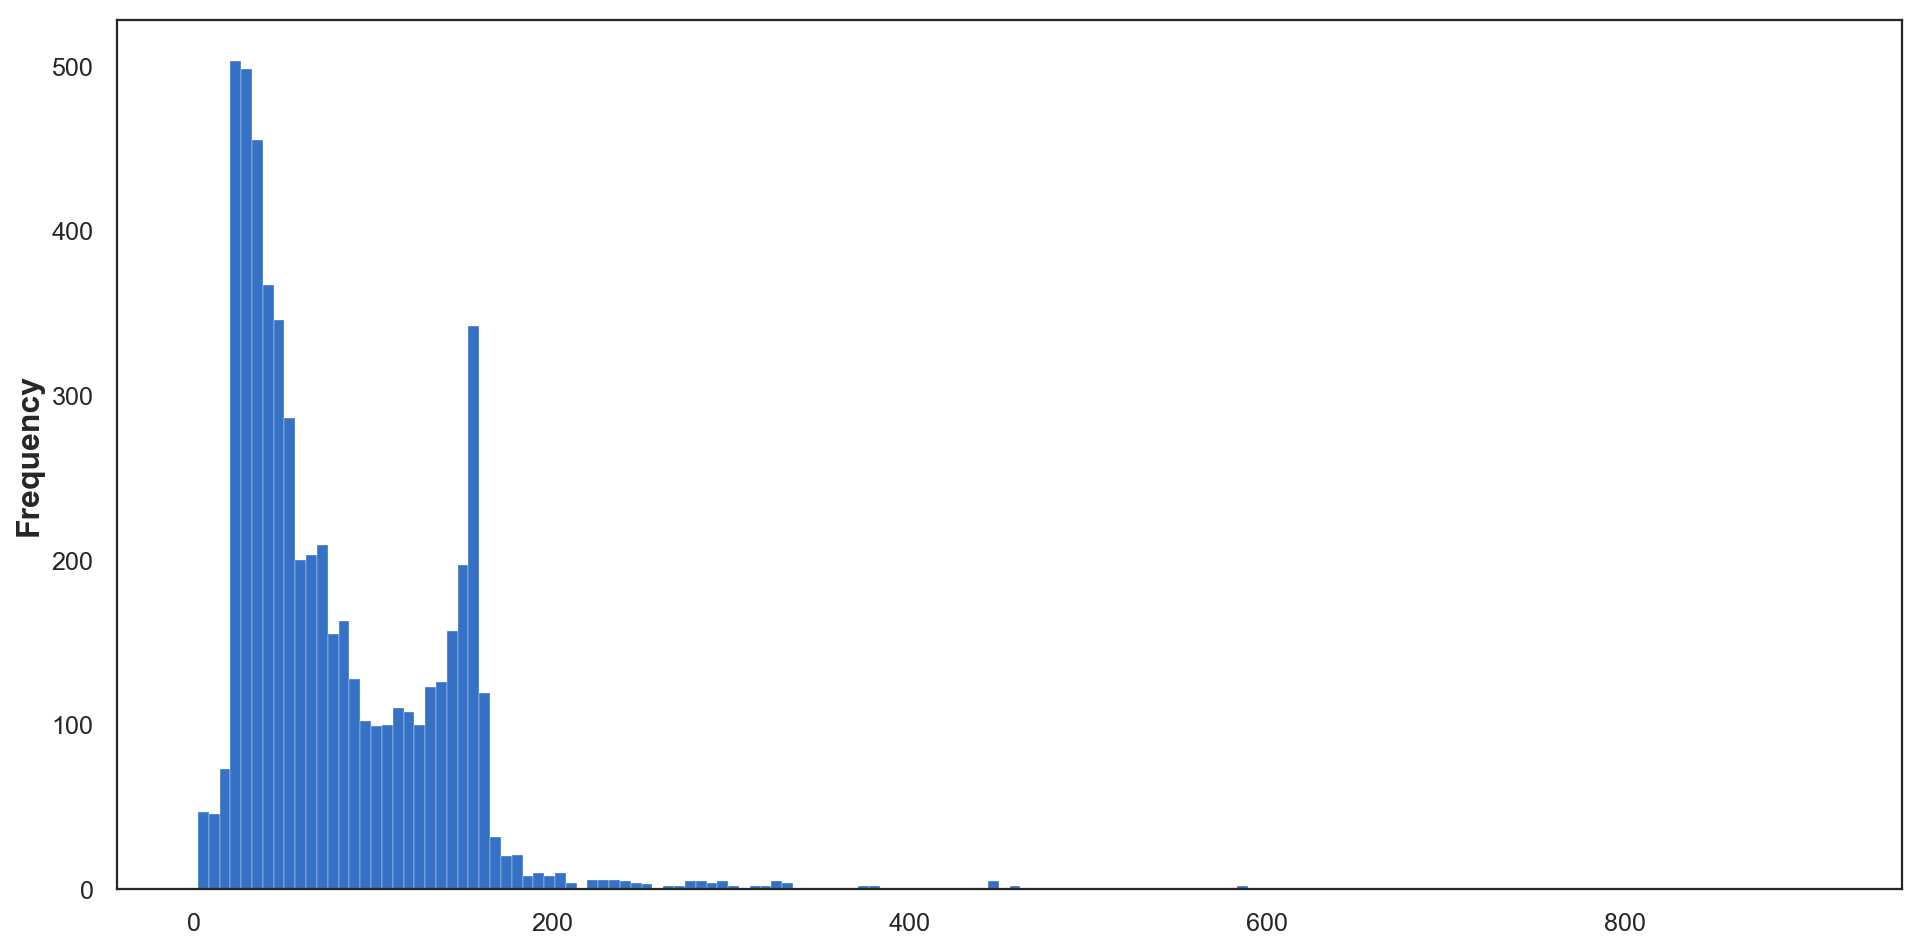

In [486]:
messages['length'].plot.hist(bins=150)

In [487]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000207421F5C50>,
      dtype=object)

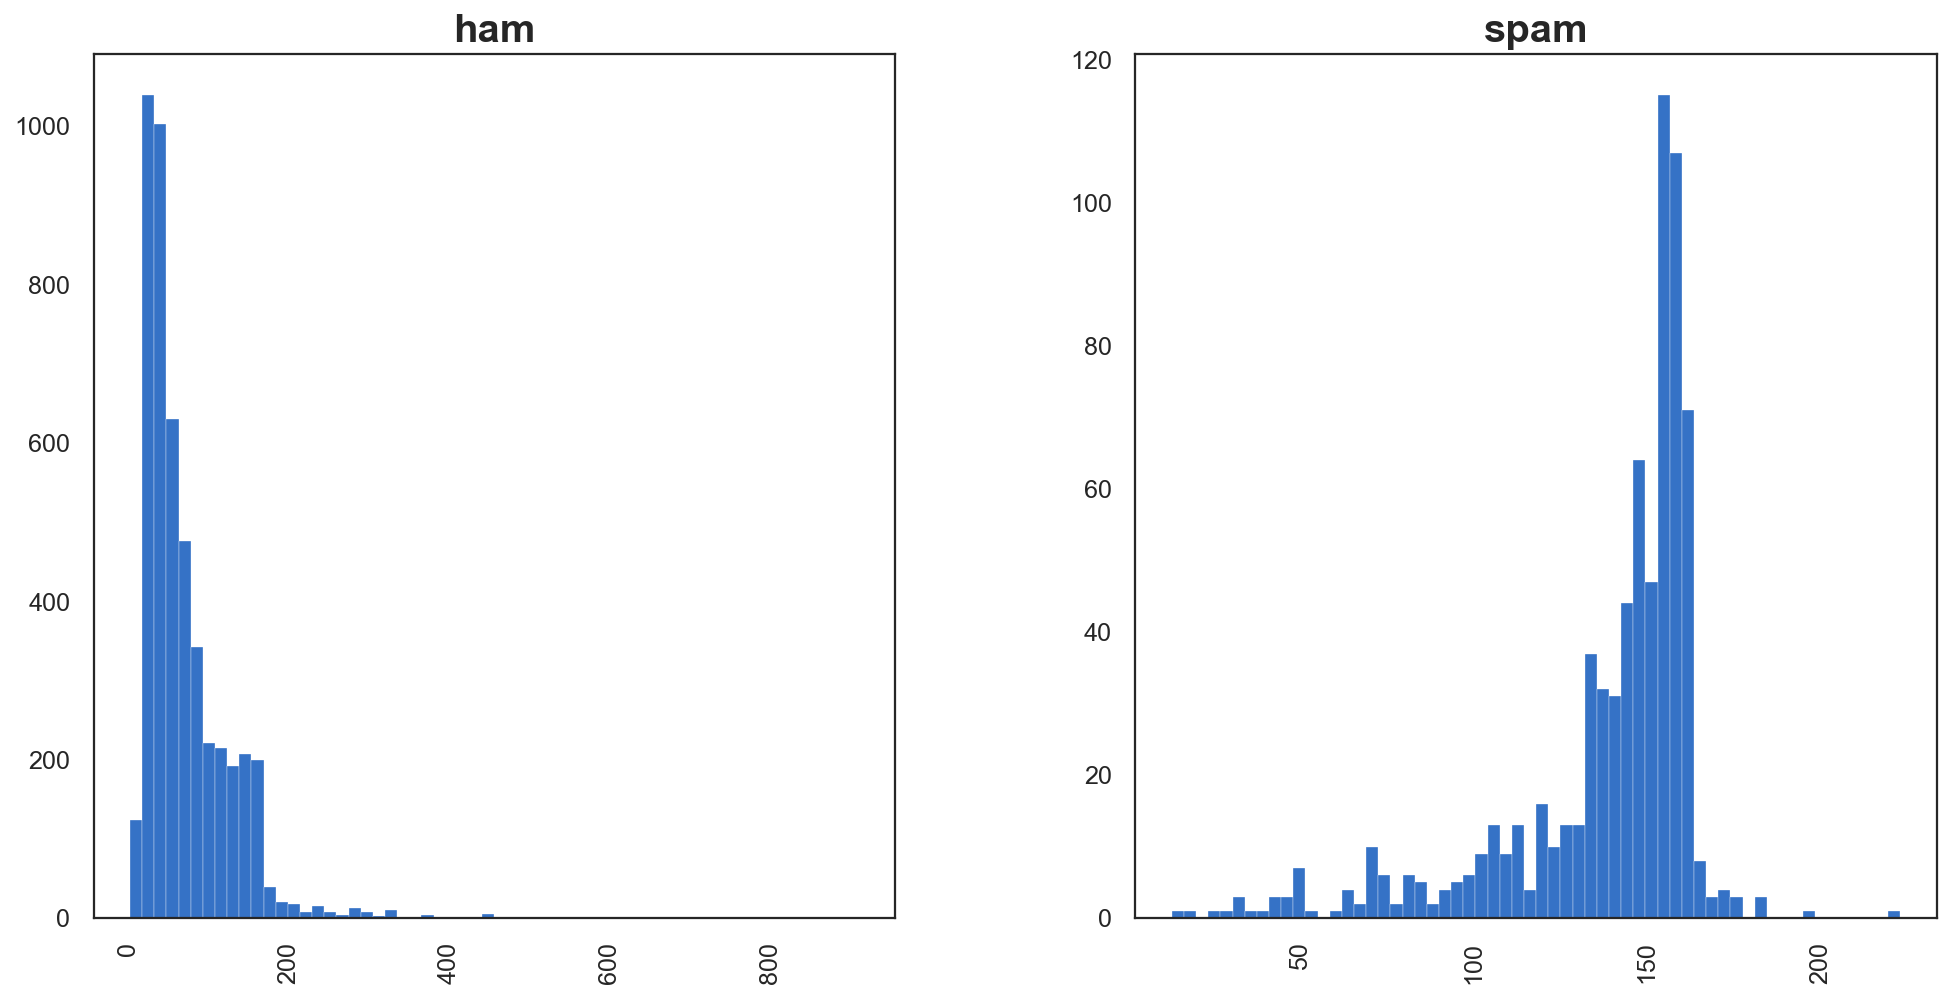

In [489]:
messages.hist(column='length', by='label', bins=60)

In [518]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [499]:
def text_process(message):
    """
    1. remove punctuation
    2. remove stop words
    3. return list of clean words
    """
    
    nopunc = [char for char in message if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [500]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [503]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [506]:
messages_bow = bow_transformer.transform(messages['message'])

In [ ]:
messages_bow.shape

In [507]:
sparcity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('Sparcity: {}'.format(sparcity))

Sparcity: 0.07940295412668218


In [511]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [514]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [517]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.3, random_state=101)

In [519]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [520]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0000020742680BF8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [525]:
label_pred = pipeline.predict(msg_test)

In [526]:
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

   micro avg       0.96      0.96      0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672



## Use Case

In [531]:
yelp = pd.read_csv('./data/yelp.csv')

In [532]:
yelp['text length'] = yelp['text'].apply(len)

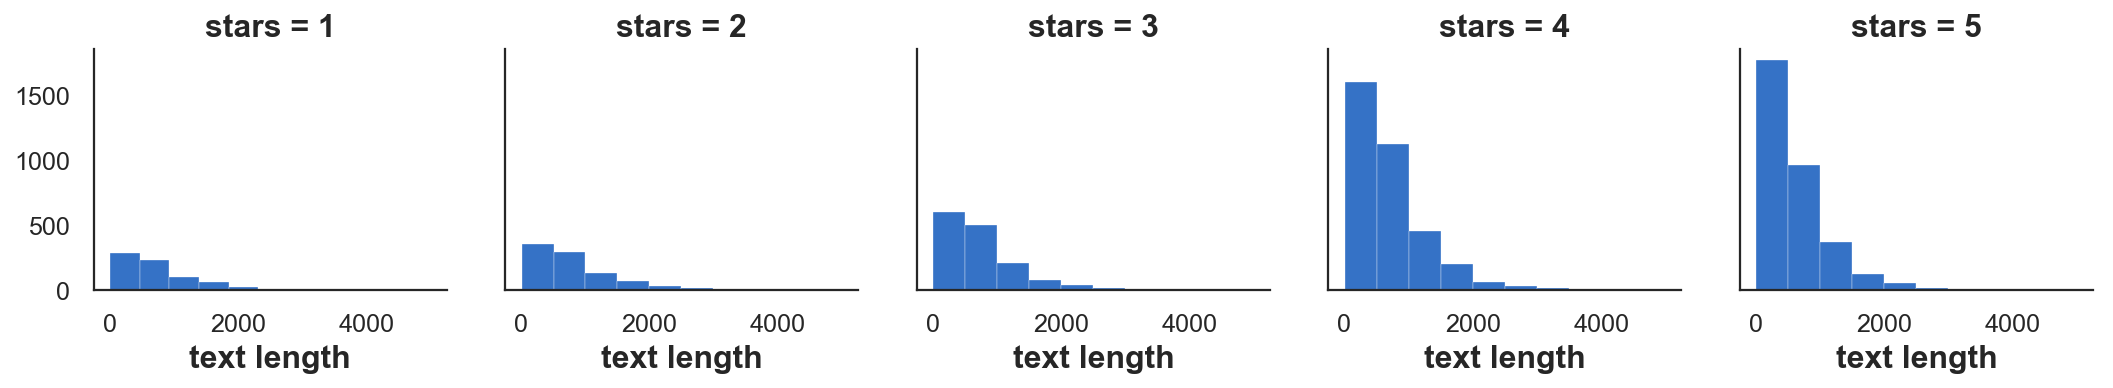

In [533]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length')

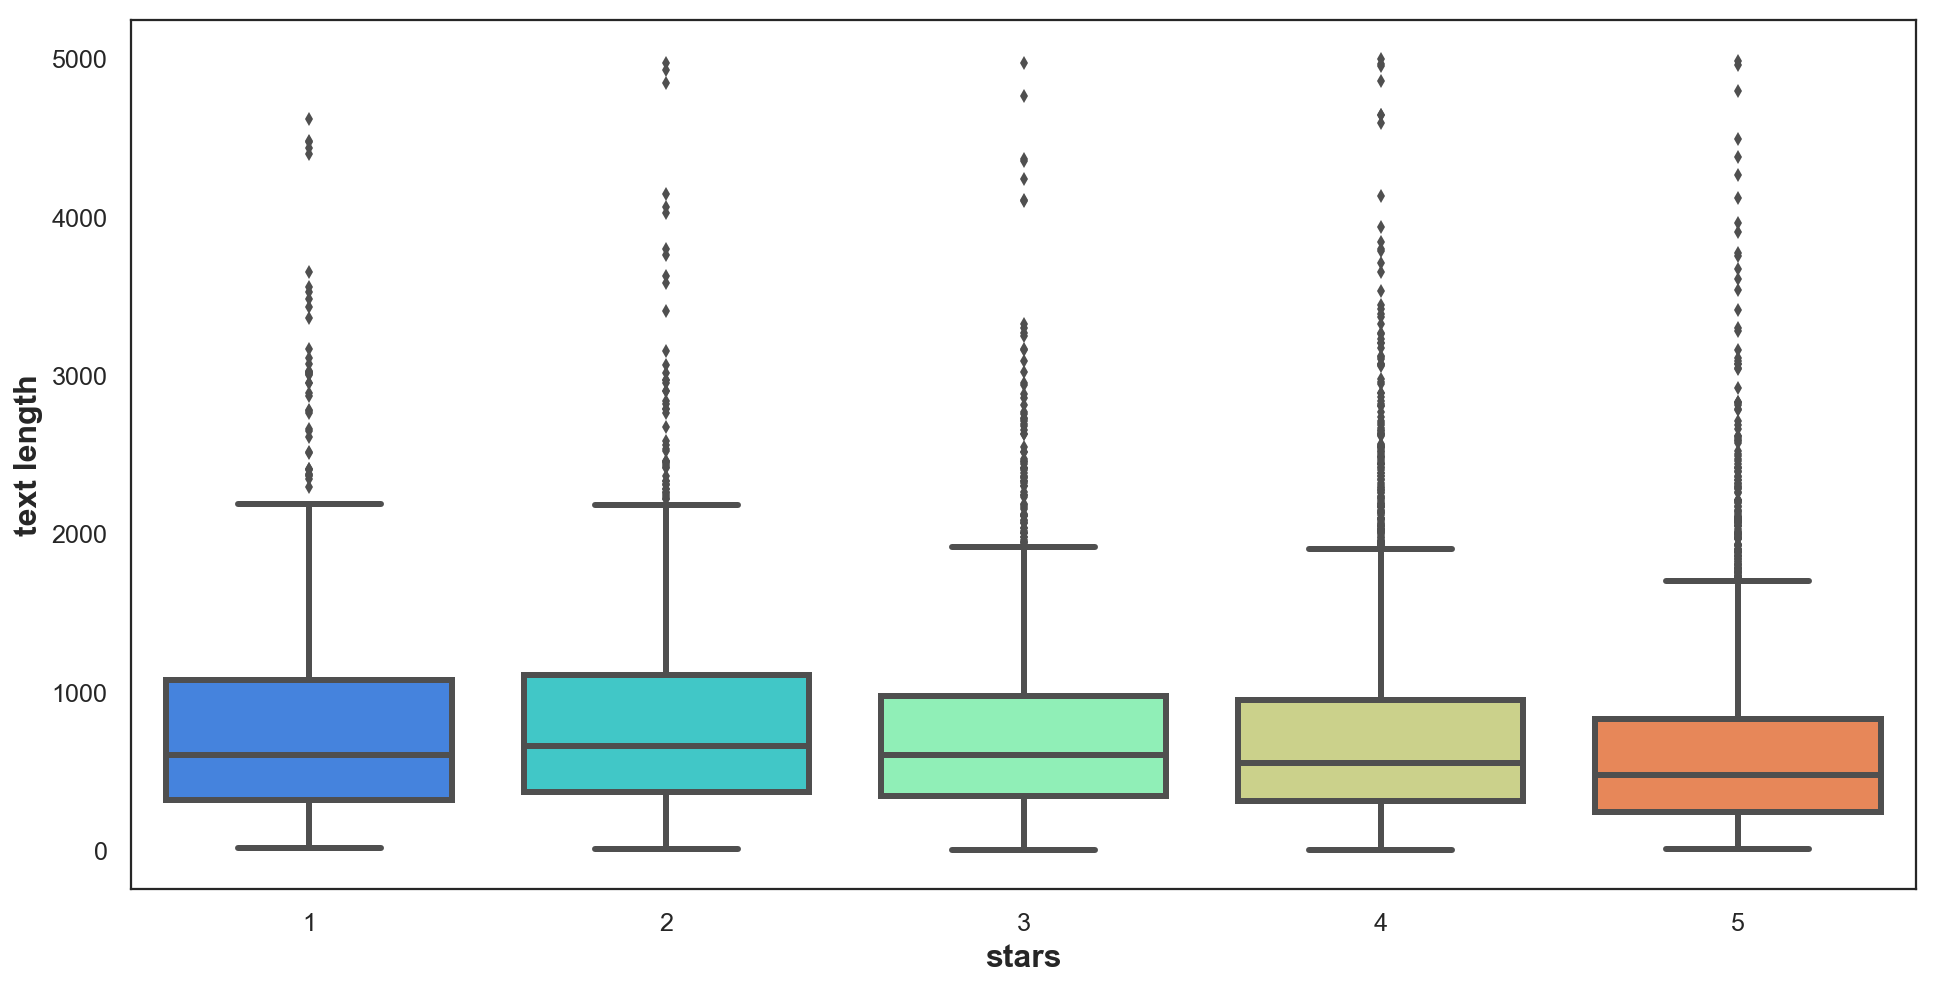

In [534]:
sns.boxplot(x='stars', y='text length', data=yelp, palette='rainbow')

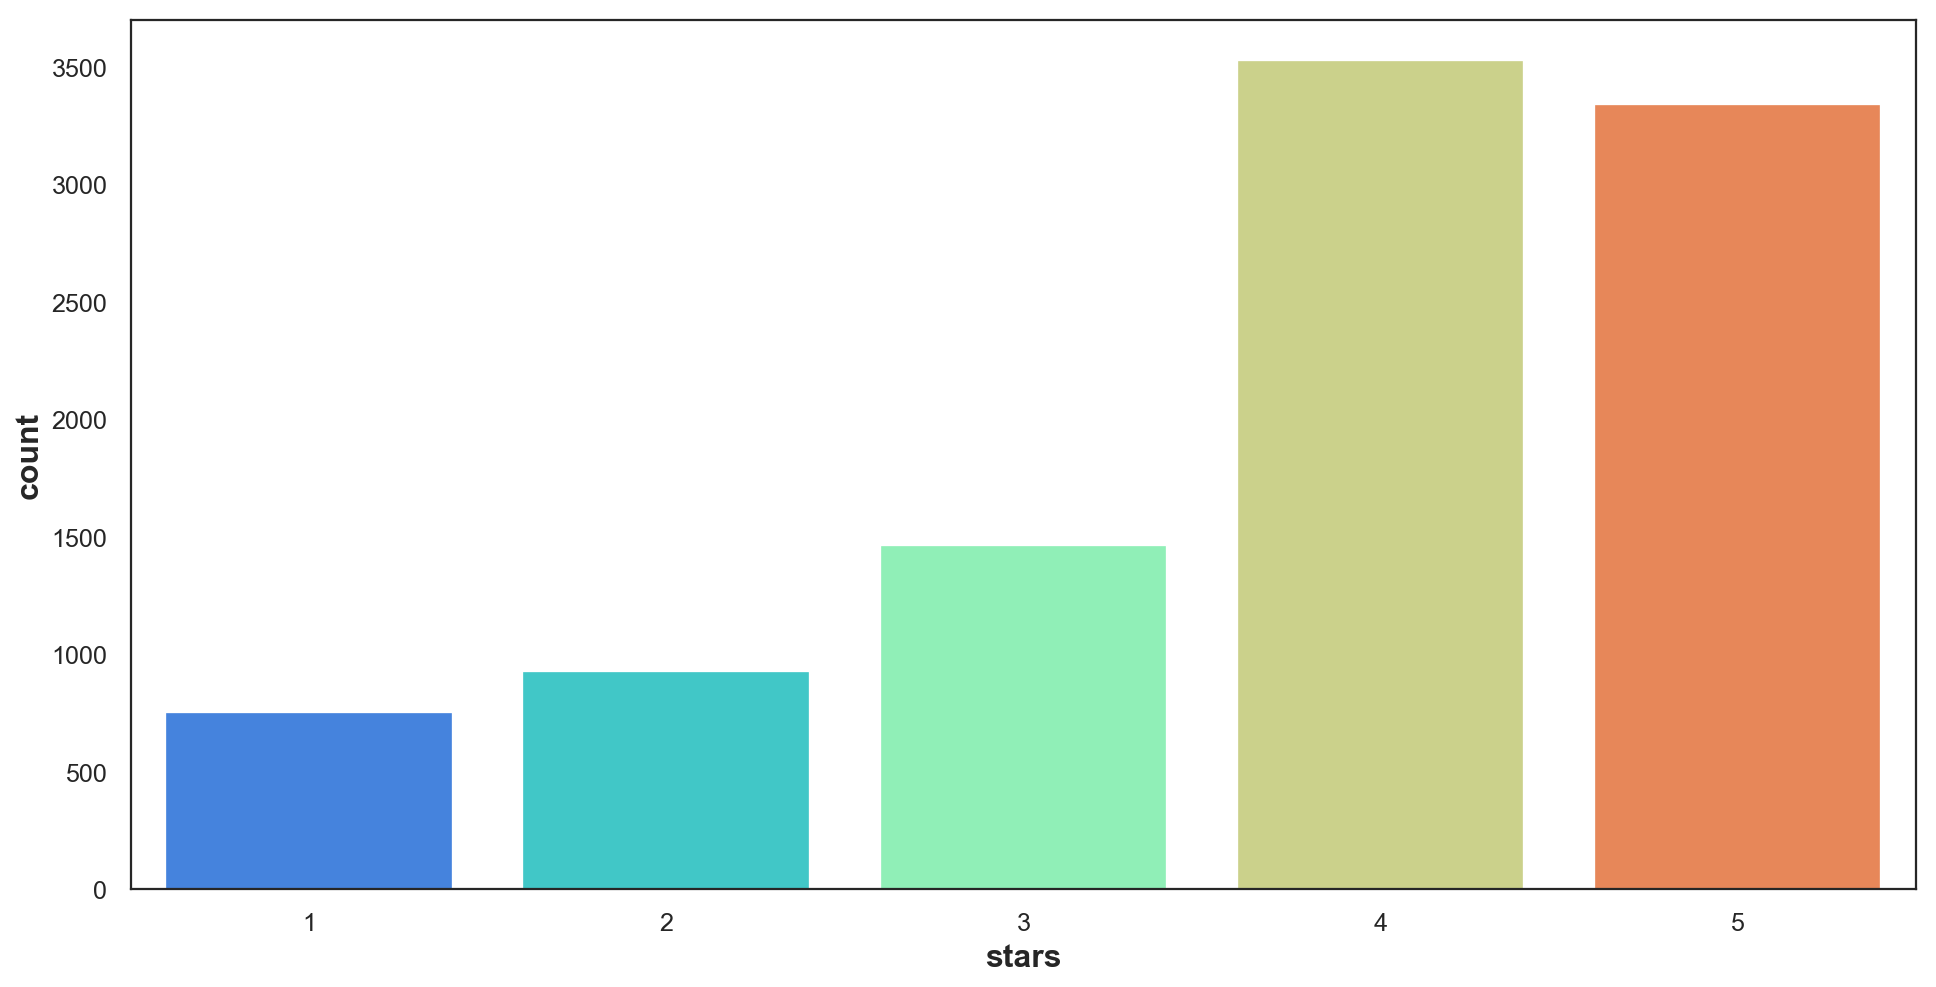

In [535]:
sns.countplot(x='stars', data=yelp, palette='rainbow')

In [537]:
stars = yelp.groupby('stars').mean()
stars

cool  useful   funny  text length
stars                                     
1     0.57677 1.60481 1.05607    826.51535
2     0.71953 1.56311 0.87594    842.25674
3     0.78850 1.30664 0.69473    758.49829
4     0.95462 1.39592 0.67045    712.92314
5     0.94426 1.38178 0.60863    624.99910

In [538]:
stars.corr()

cool   useful    funny  text length
cool         1.00000 -0.74333 -0.94494     -0.85766
useful      -0.74333  1.00000  0.89451      0.69988
funny       -0.94494  0.89451  1.00000      0.84346
text length -0.85766  0.69988  0.84346      1.00000

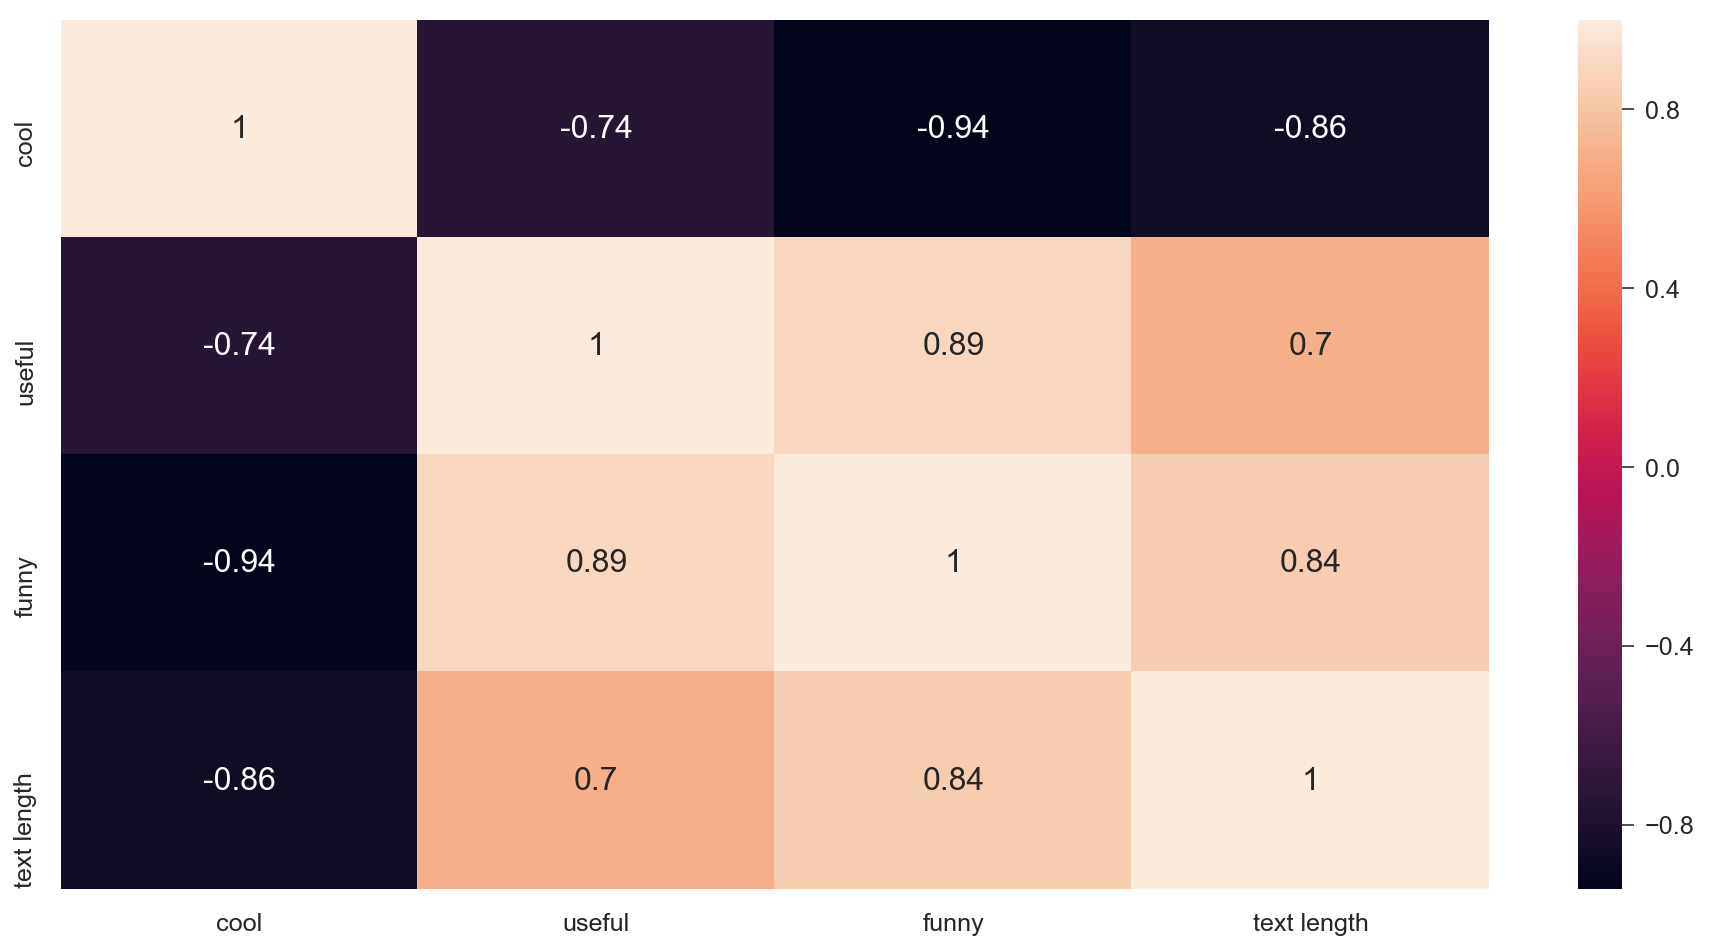

In [539]:
sns.heatmap(stars.corr(), annot=True)

In [555]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

X = yelp_class['text']
y = yelp_class['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [559]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [560]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [561]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

   micro avg       0.93      0.93      0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226

[[155  73]
 [ 15 983]]
